<a href="https://colab.research.google.com/github/adisanto85/DataSecurity/blob/main/Data_Security_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Security Project - [CSE-CIC-IDS2018 on AWS](https://www.unb.ca/cic/datasets/ids-2018.html)

The following notebook is a case study showing a method for the analysis, mainly analytics driven, of the CSE-CIC-IDS2018 on AWS dataset, which simulates a series of attacks from a network of attacker's machines to a network of machines divided in five departments plus servers. The network topology is shown below.

The first part of the notebook is focused on a descriptive analysis of the dataset, with the use of basic cyber threat intelligence techniques, in order to better understand the dataset and the attacker techniques and methods of exploitation.

The second part is dedicated to build a classifier, in order to automatically detect potential threats by training a model with the simulated dataset. Two different models will be adopted: a plain Random Forest classifier, and a neural network classifier combined with features generated via an Autoencoder for dimensionality reduction.

The full dataset in seven parts is used for the analysis, as downloaded from the project website (linked in the title). Additionally, a summary table will be parsed from the project website, to provide further analytics and data description.

>[Data Security Project - CSE-CIC-IDS2018 on AWS](#scrollTo=9BBXkcKVHpdi)

>>[Information gathering - OSINT](#scrollTo=u26_WR8MJQ-n)

>>>[Network Topology and Dataset Description](#scrollTo=X_-TosMCLDDk)

>>>[M Profiles](#scrollTo=YBit0t0SJ2-5)

>>>[Diamond Model of the Attack Scenario](#scrollTo=vSMUikGJeuH_)

>>>[Summary Table of the Dataset](#scrollTo=5AqaBN0YALKq)

>>>[Visualization of attacker infos per attack type (Whois Lookup)](#scrollTo=C4W5NwR_9kez)

>>>[Attack Duration analysis](#scrollTo=TimRyQ3QcEUB)

>>>[Create STIX for Malware or other threat](#scrollTo=ArDhY-7LTip3)

>>>[Create visualization in embedded STIX Visualizer](#scrollTo=28lhoe_NTrwZ)

>>[Descriptive Analysis](#scrollTo=Iqu1qWuaJi_N)

>>>[Data Loading, Validation and Transformation](#scrollTo=5XTyPn7YKu-o)

>>>[Attack Types and Activity Count](#scrollTo=Z96M0m9GHyHw)

>>>[Analysis of Benign and Malicious Activity](#scrollTo=vxOvKpI9MCxS)

>>[Classifier Model Building](#scrollTo=uUZgmeDXJrIs)

>>>[Data Preparation for Classification Model](#scrollTo=OSJejuaNd49E)

>>>[Random Forest Binary Classifier](#scrollTo=V9U_twpmfd_y)

>>>[Random Forest Multiple Classifier](#scrollTo=_u8DLGmMikcO)

>>>[Autoencoding of Features - Data Transformation and Model Building](#scrollTo=JrRT3m7Umkh4)

>>>[Autoencoding of Datasets Separately](#scrollTo=GuHRfvoAmvZM)

>>>[Data Preparation for NN Classifier with Autoencoded Features](#scrollTo=U1m7uWCYn3Tu)

>>>[Neural Network Building and Running](#scrollTo=KAifrMZdo6DR)



In [2]:
!pip install stix2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=fef1c1262cdfdaa460015c65cf26dd35a876fab653a441e7c5c8e83d578932b0
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import scipy.stats
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import webbrowser
import ipaddress
from datetime import datetime
from stix2 import Indicator, Malware, ThreatActor, Bundle
import json
import warnings
import re
import uuid
from IPython.core.magic import register_line_magic
import IPython
import subprocess
warnings.filterwarnings('ignore')

## Information gathering - OSINT

### Network Topology and Dataset Description

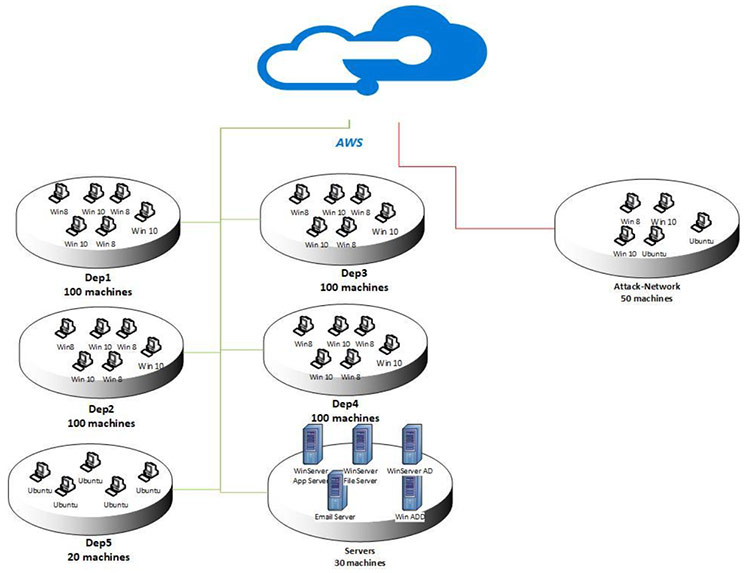

### M Profiles



*   Infiltration attack
*   [DoS](https://attack.mitre.org/techniques/T1498/) attack --> Hulk, GoldenEye, Slowloris, Slowhttptest, [Heartleech](https://www.kali.org/tools/heartleech/) for [Heartbleed](https://owasp.org/www-community/vulnerabilities/Heartbleed_Bug)
*   [Brute Force](https://attack.mitre.org/techniques/T1110/) attack --> [Patator](https://www.kali.org/tools/patator/): FTP and SSH modules
*   Web attack --> Damn Vulnerable Web App (DVWA): [SQL injection](https://owasp.org/www-community/attacks/SQL_Injection), [command injection](https://owasp.org/www-community/attacks/Command_Injection), and [unrestricted file upload](https://owasp.org/www-community/vulnerabilities/Unrestricted_File_Upload)
*   [Botnet](https://attack.mitre.org/techniques/T1583/005/) attack --> [Zeus](https://attack.mitre.org/software/S0330/), Ares
*   DDoS+[PortScan](https://attack.mitre.org/techniques/T1046/) --> [Low Orbit Ion Cannon (LOIC)](https://www.radware.com/security/ddos-knowledge-center/ddospedia/loic-low-orbit-ion-cannon/), [High Orbit Ion Canon (HOIC)](https://www.radware.com/security/ddos-knowledge-center/ddospedia/hoic-high-orbit-ion-cannon/) for UDP, TCP, or HTTP requests



### Diamond Model of the Attack Scenario

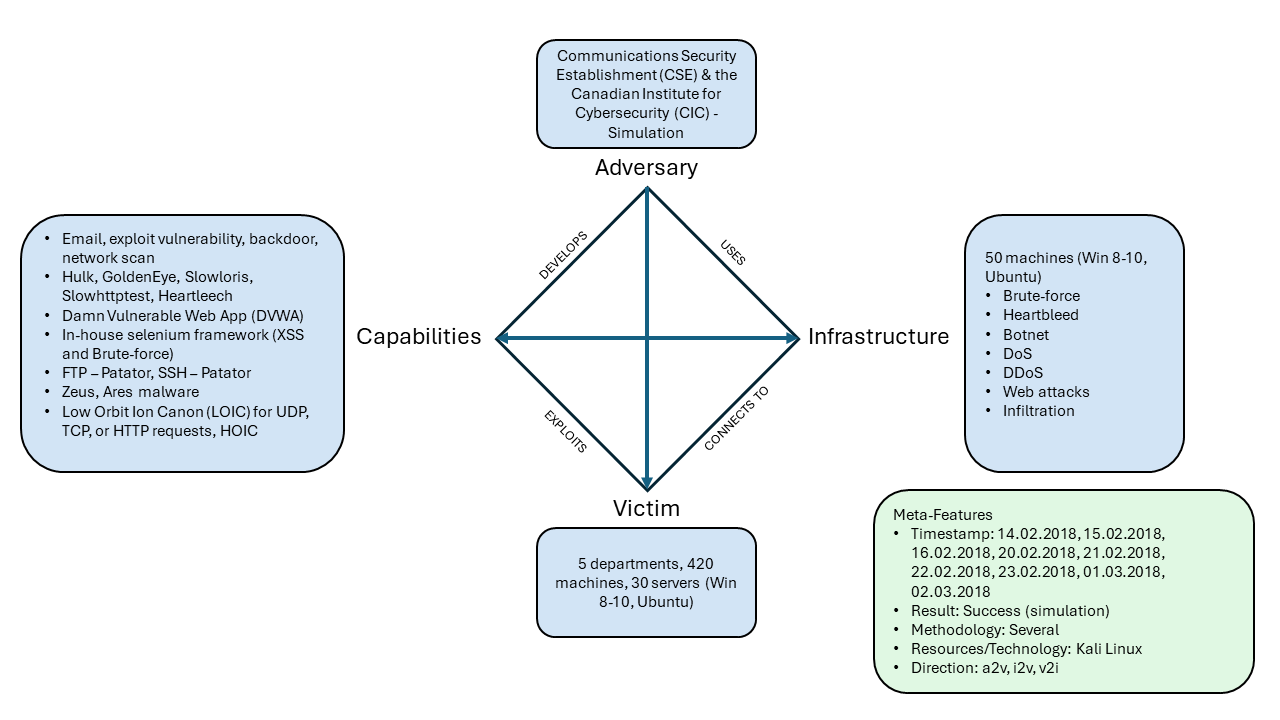

### Summary Table of the Dataset

List of daily attacks, Machine IPs, Start and finish time of attack(s)

In [ ]:
df_dataset_summary = pd.read_csv('/content/drive/MyDrive/DataSecurity/dataset_summary.csv')
df_dataset_summary = df_dataset_summary.drop(columns='Unnamed: 0')
df_dataset_summary

,Attacker,Victim,Attack Name,Date,Attack Start Time,Attack Finish Time
0,"['172.31.70.4', '(Valid IP:18.221.219.4)']","['172.31.69.25', '(Valid IP:18.217.21.148)']",FTP-BruteForce,Wed-14-02-2018,10:32,12:09
1,"['172.31.70.6', '(Valid IP:13.58.98.64)']",18.217.21.148- 172.31.69.25,SSH-Bruteforce,Wed-14-02-2018,14:01,15:31
2,"['172.31.70.46', '(Valid IP:18.219.211.138)']",18.217.21.148- 172.31.69.25,DoS-GoldenEye,Thurs-15-02-2018,9:26,10:09
3,"['172.31.70.8', '(Vazlid IP:18.217.165.70)']",18.217.21.148- 172.31.69.25,DoS-Slowloris,Thurs-15-02-2018,10:59,11:40
4,"['172.31.70.23', '(Valid IP: 13.59.126.31)']",18.217.21.148- 172.31.69.25,DoS-SlowHTTPTest,Fri-16-02-2018,10:12,11:08
5,"['172.31.70.16', '(Valid IP:18.219.193.20)']",18.217.21.148- 172.31.69.25,DoS-Hulk,Fri-16-02-2018,13:45,14:19
6,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.217.21.148- 172.31.69.25,DDoS attacks-LOIC-HTTP,Tues-20-02-2018,10:12,11:17
7,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.217.21.148- 172.31.69.25,DDoS-LOIC-UDP,Tues-20-02-2018,13:13,13:32
8,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.218.83.150- 172.31.69.28,DDOS-LOIC-UDP,Wed-21-02-2018,10:09,10:43
9,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.218.83.150- 172.31.69.28,DDOS-HOIC,Wed-21-02-2018,14:05,15:05


### Visualization of attacker infos per attack type (Whois Lookup)

Select attack type to inspect attacker's IP

In [ ]:
attack_type = 'Infiltration'

In [ ]:
# Function to check if an IP address is valid
def is_valid_ip(ip):
    try:
        ipaddress.ip_address(ip)
        return True
    except ValueError:
        return False

cell_element = df_dataset_summary.loc[df_dataset_summary['Attack Name'] == attack_type]['Attacker'].unique()[0]

if 'IP' in cell_element:
  cell_element = cell_element.strip('][').split(', ')
  whois_ip_index = cell_element[1].index(":")
  whois_ip = cell_element[1][whois_ip_index+1:-1]
  myurl1 = 'https://search.dnslytics.com/ip/'+whois_ip[:-1]
  myurl2 = 'https://whois.domaintools.com/'+whois_ip[:-1]
  print(myurl1)
  print(myurl2)
  print()
elif len(cell_element) > 50:
  cell_element = cell_element.strip('][').split(', ')
  for url in cell_element:
    myurl1 = 'https://search.dnslytics.com/ip/'+url[1:-1]
    myurl2 = 'https://whois.domaintools.com/'+url[1:-1]
    print(myurl1)
    print(myurl2)
    print()
else:
  whois_ip = df_dataset_summary.loc[df_dataset_summary['Attack Name'] == attack_type]['Attacker'].unique()[0]
  myurl1 = 'https://search.dnslytics.com/ip/'+whois_ip
  myurl2 = 'https://whois.domaintools.com/'+whois_ip
  print(myurl1)
  print(myurl2)
  print()

https://search.dnslytics.com/ip/13.58.225.34
https://whois.domaintools.com/13.58.225.34



### Attack Duration analysis

In [ ]:
df_dataset_summary['date'] = [date[-10:] for date in df_dataset_summary['Date']]
start_time = pd.to_datetime(df_dataset_summary['date']+" "+df_dataset_summary['Attack Start Time'], format="%d-%m-%Y %H:%M")
end_time = pd.to_datetime(df_dataset_summary['date']+" "+df_dataset_summary['Attack Finish Time'], format="%d-%m-%Y %H:%M")

df_dataset_summary['Attack Duration'] = (end_time - start_time) / pd.Timedelta(hours=1)
df_dataset_summary = df_dataset_summary.drop(columns=['date'])

df_dataset_summary

,Attacker,Victim,Attack Name,Date,Attack Start Time,Attack Finish Time,Attack Duration
0,"['172.31.70.4', '(Valid IP:18.221.219.4)']","['172.31.69.25', '(Valid IP:18.217.21.148)']",FTP-BruteForce,Wed-14-02-2018,10:32,12:09,1.616667
1,"['172.31.70.6', '(Valid IP:13.58.98.64)']",18.217.21.148- 172.31.69.25,SSH-Bruteforce,Wed-14-02-2018,14:01,15:31,1.500000
2,"['172.31.70.46', '(Valid IP:18.219.211.138)']",18.217.21.148- 172.31.69.25,DoS-GoldenEye,Thurs-15-02-2018,9:26,10:09,0.716667
3,"['172.31.70.8', '(Vazlid IP:18.217.165.70)']",18.217.21.148- 172.31.69.25,DoS-Slowloris,Thurs-15-02-2018,10:59,11:40,0.683333
4,"['172.31.70.23', '(Valid IP: 13.59.126.31)']",18.217.21.148- 172.31.69.25,DoS-SlowHTTPTest,Fri-16-02-2018,10:12,11:08,0.933333
5,"['172.31.70.16', '(Valid IP:18.219.193.20)']",18.217.21.148- 172.31.69.25,DoS-Hulk,Fri-16-02-2018,13:45,14:19,0.566667
6,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.217.21.148- 172.31.69.25,DDoS attacks-LOIC-HTTP,Tues-20-02-2018,10:12,11:17,1.083333
7,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.217.21.148- 172.31.69.25,DDoS-LOIC-UDP,Tues-20-02-2018,13:13,13:32,0.316667
8,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.218.83.150- 172.31.69.28,DDOS-LOIC-UDP,Wed-21-02-2018,10:09,10:43,0.566667
9,"['18.218.115.60', '18.219.9.1', '18.219.32.43'...",18.218.83.150- 172.31.69.28,DDOS-HOIC,Wed-21-02-2018,14:05,15:05,1.000000


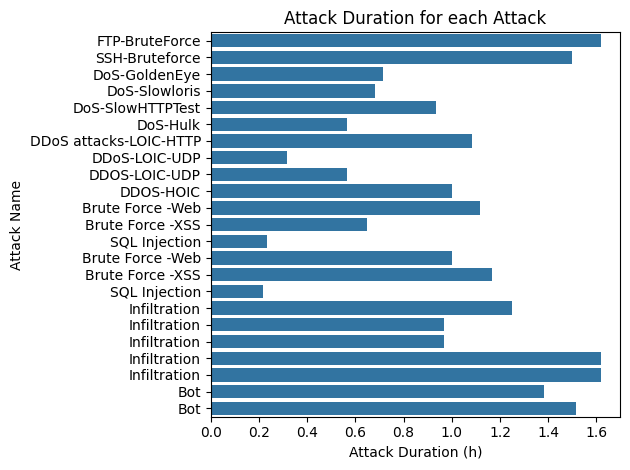

In [ ]:
ax = sns.barplot(x=df_dataset_summary['Attack Duration'], y=df_dataset_summary.index, orient='h')
ax.set_yticklabels(df_dataset_summary['Attack Name'])
plt.ylabel('Attack Name')
plt.xlabel('Attack Duration (h)')
plt.title('Attack Duration for each Attack')
plt.tight_layout()

In [ ]:
df_attack_total_duration = df_dataset_summary[['Attack Name', 'Attack Duration']].groupby('Attack Name').sum()
df_attack_total_duration

,Attack Duration
Attack Name,
Bot,2.900000
Brute Force -Web,2.116667
Brute Force -XSS,1.816667
DDOS-HOIC,1.000000
DDOS-LOIC-UDP,0.566667
DDoS attacks-LOIC-HTTP,1.083333
DDoS-LOIC-UDP,0.316667
DoS-GoldenEye,0.716667
DoS-Hulk,0.566667


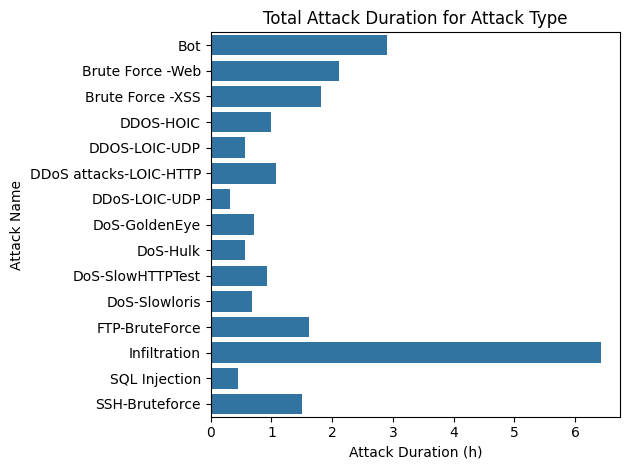

In [ ]:
sns.barplot(df_attack_total_duration, x="Attack Duration", y="Attack Name", errorbar=None, orient='h')
plt.xlabel('Attack Duration (h)')
plt.title('Total Attack Duration for Attack Type')
plt.tight_layout()

### Create STIX for Malware or other threat

In [ ]:
# Generate unique IDs
indicator_id = f"indicator--{uuid.uuid4()}"
malware_id = f"malware--{uuid.uuid4()}"
threat_actor_id = f"threat-actor--{uuid.uuid4()}"

# Define STIX objects
indicators = [
    Indicator(
        id=indicator_id,
        indicator_types=['malicious-activity'],
        pattern="[file:hashes.md5 = '66213afc42b9176391f5a1abe6787b45']",
        pattern_type="stix"
    )
]

malware = [
    Malware(
        id=malware_id,
        name='Zeus',
        is_family=True,
        aliases=['Zbot'],
        external_references=[{"source_name": "Malpedia", "url": "https://malpedia.caad.fkie.fraunhofer.de/details/win.zeus"}]
    )
]

threat_actors = [
    ThreatActor(
        id=threat_actor_id,
        name='CSE-CIC',
        sophistication='advanced',
        resource_level='university',
        goals=['steal banking property', 'ransomware']
    )
]

# Assemble STIX Bundle
bundle = Bundle(objects=indicators + malware + threat_actors)

# Serialize the bundle object to JSON with proper indentation
stix_report = bundle.serialize(pretty=True)

# Print or save the STIX report
print(stix_report)

{
    "type": "bundle",
    "id": "bundle--d991f19d-2056-4752-af20-7ca209cf7872",
    "objects": [
        {
            "type": "indicator",
            "spec_version": "2.1",
            "id": "indicator--a6935a1f-76cc-4257-88c0-2fca2bbf47fa",
            "created": "2024-06-03T09:26:39.583764Z",
            "modified": "2024-06-03T09:26:39.583764Z",
            "indicator_types": [
                "malicious-activity"
            ],
            "pattern": "[file:hashes.md5 = '66213afc42b9176391f5a1abe6787b45']",
            "pattern_type": "stix",
            "pattern_version": "2.1",
            "valid_from": "2024-06-03T09:26:39.583764Z"
        },
        {
            "type": "malware",
            "spec_version": "2.1",
            "id": "malware--2058086f-5261-48fa-ac46-5ef7dd95e210",
            "created": "2024-06-03T09:26:39.637796Z",
            "modified": "2024-06-03T09:26:39.637796Z",
            "name": "Zeus",
            "is_family": true,
            "aliases": [
  

### Create visualization in embedded STIX Visualizer

In [ ]:
@register_line_magic
def run_local_server(line):
    handle = IPython.display.display(
            IPython.display.Pretty("Launching my server..."),
            display_id=True,
    )
    subprocess.Popen(['python', '-m', 'http.server'])
    shell = """
        (async () => {
            const url = new URL('https://oasis-open.github.io/cti-stix-visualization/');
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '400');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    script = IPython.display.Javascript(shell)
    handle.update(script)

In [ ]:
%run_local_server

<IPython.core.display.Javascript object>

## Descriptive Analysis

### Data Loading, Validation and Transformation

In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-14-2018.csv')
data2 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-21-2018.csv')
data3 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-22-2018.csv')
data4 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-23-2018.csv')
data5 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-28-2018.csv')
data6 = pd.read_csv('/content/drive/MyDrive/DataSecurity/03-01-2018.csv')
data7 = pd.read_csv('/content/drive/MyDrive/DataSecurity/03-02-2018.csv')


In [ ]:
data1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
data1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

The following features are considered the most relevant:

* Dst Port (Destination port)
* Protocol
* Flow Duration
* Tot Fwd Pkts (Total forward packets)
* Tot Bwd Pkts (Total backward packets)
* Label (Label)

Due to memory limitations of Colab, to create a full dataset with all the attacks in all the different days, only these features are kept and analyzed in a first stance. Additionally, also the column Timestamp will be kept, as it will be useful in the following analysis. The previously loaded datasets will be deleted from memory.



In [5]:
features = ['Timestamp', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Label']

data_sample1 = data1[features]
data_sample2 = data2[features]
data_sample3 = data3[features]
data_sample4 = data4[features]
data_sample5 = data5[features]
data_sample6 = data6[features]
data_sample7 = data7[features]

df_list = [data_sample1, data_sample2, data_sample3, data_sample4, data_sample5, data_sample6, data_sample7]

del data1
del data2
del data3
del data4
del data5
del data6
del data7

df_data = pd.concat(df_list, axis=0, ignore_index=True)

df_data.head()

,Timestamp,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,14/02/2018 08:31:01,0,0,112641719,3,0,Benign
1,14/02/2018 08:33:50,0,0,112641466,3,0,Benign
2,14/02/2018 08:36:39,0,0,112638623,3,0,Benign
3,14/02/2018 08:40:13,22,6,6453966,15,10,Benign
4,14/02/2018 08:40:23,22,6,8804066,14,11,Benign


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187104 entries, 0 to 6187103
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Timestamp      object
 1   Dst Port       object
 2   Protocol       object
 3   Flow Duration  object
 4   Tot Fwd Pkts   object
 5   Tot Bwd Pkts   object
 6   Label          object
dtypes: object(7)
memory usage: 330.4+ MB


In [ ]:
df_data.describe()

,Timestamp,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
count,6187104,6187104,6187104,6187104,6187104,6187104,6187104
unique,196863,75643,7,1921047,3851,2860,11
top,28/02/2018 01:48:05,80,6,1,2,1,Benign
freq,3055,1315521,4558911,102653,1747737,1685785,4669302


### Attack Types and Activity Count

In [ ]:
pd.DataFrame(df_data['Label'].unique(), columns=['Attack Types'])

,Attack Types
0,Benign
1,FTP-BruteForce
2,SSH-Bruteforce
3,DDOS attack-LOIC-UDP
4,DDOS attack-HOIC
5,Brute Force -Web
6,Brute Force -XSS
7,SQL Injection
8,Label
9,Infilteration


In [ ]:
df_data['Label'].value_counts()

Label
Benign                  4669302
DDOS attack-HOIC         686012
Bot                      286191
FTP-BruteForce           193360
SSH-Bruteforce           187589
Infilteration            161934
DDOS attack-LOIC-UDP       1730
Brute Force -Web            611
Brute Force -XSS            230
SQL Injection                87
Label                        58
Name: count, dtype: int64

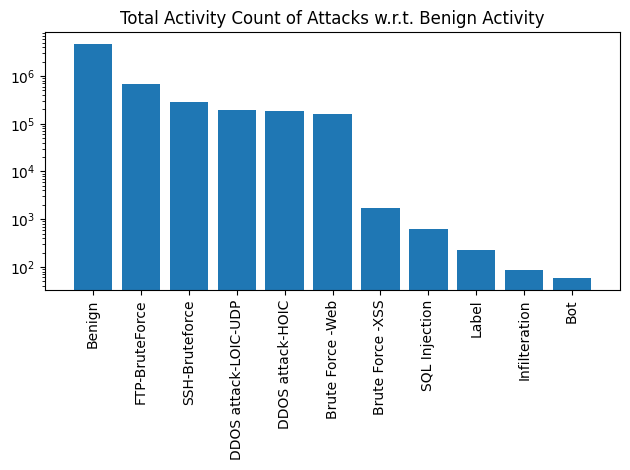

In [ ]:
counts = df_data['Label'].value_counts()

# Switching to the OO-interface. You can do all of this with "plt" as well.
fig, ax = plt.subplots()
ax.bar(df_data['Label'].unique(), counts, width=0.8, align='center')
plt.xticks(rotation=90)
ax.set_yscale('log')
ax.set(xticks=range(11), xlim=[-1, 11])

plt.title('Total Activity Count of Attacks w.r.t. Benign Activity')
plt.tight_layout()


plt.show()

### Analysis of Benign and Malicious Activity

In [19]:
df_benign = df_data.loc[df_data['Label'] == 'Benign']

In [ ]:
print(len(df_benign), len(df_data))

4669302 6187104


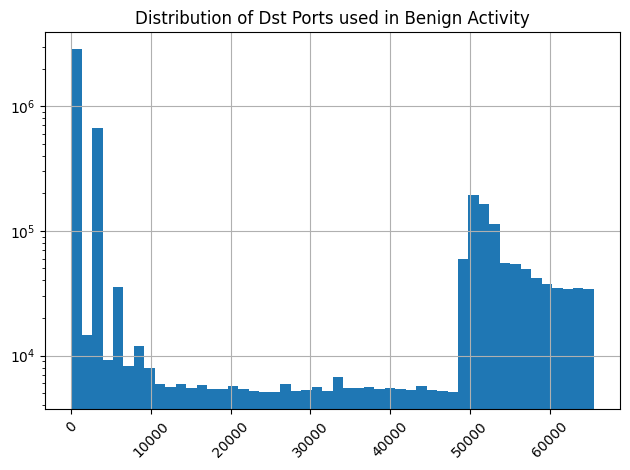

In [ ]:
df_benign['Dst Port'].astype(int).hist(xrot=45, bins=50, log=True)
plt.title('Distribution of Dst Ports used in Benign Activity')
plt.tight_layout()



*   Malicious activity per dataset (e.g. day)


In [ ]:
print(data_sample1['Label'].unique())
print(data_sample2['Label'].unique())
print(data_sample3['Label'].unique())
print(data_sample4['Label'].unique())
print(data_sample5['Label'].unique())
print(data_sample6['Label'].unique())
print(data_sample7['Label'].unique())

['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']
['Benign' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC']
['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection']
['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection']
['Benign' 'Label' 'Infilteration']
['Benign' 'Label' 'Infilteration']
['Benign' 'Bot']


* Modules for data cleaning

In [6]:
def is_int(x):
    try:
        int(x)
    except ValueError:
        return False
    return True

In [7]:
def custom_convert(value):
    try:
        return int(value)
    except ValueError:
        return value  # Return the original value if it's not convertible to int


In [20]:
date_str = '14/02/2018'
datetime_object = datetime.strptime(date_str, '%d/%m/%Y').date()

df_data = df_data[df_data['Dst Port'].apply(lambda x: is_int(x))]

df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'])
df_data['Date'] = pd.to_datetime(df_data['Timestamp']).dt.date
df_data_dt_cleaned = df_data.loc[df_data['Date']>=datetime_object]

In [ ]:
print(df_data_dt_cleaned['Timestamp'].min(), df_data_dt_cleaned['Timestamp'].max())

2018-02-14 01:00:00 2018-03-02 12:59:59


* Plot of attacks as time series of Tot Fwd Pkts and Tot Bwd Pkts of the different datasets

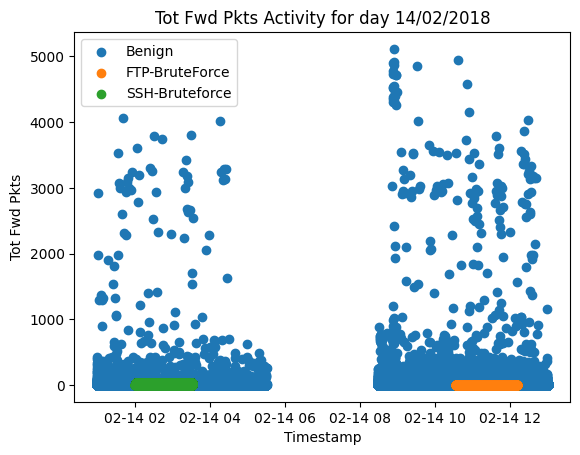

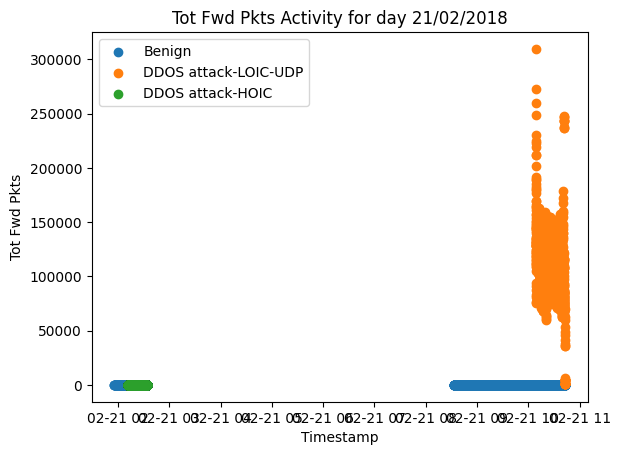

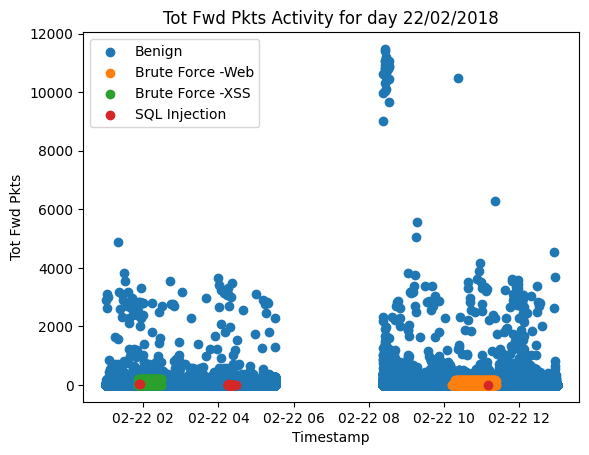

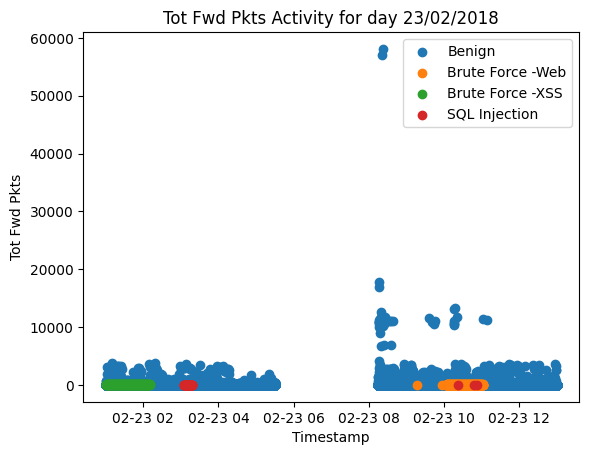

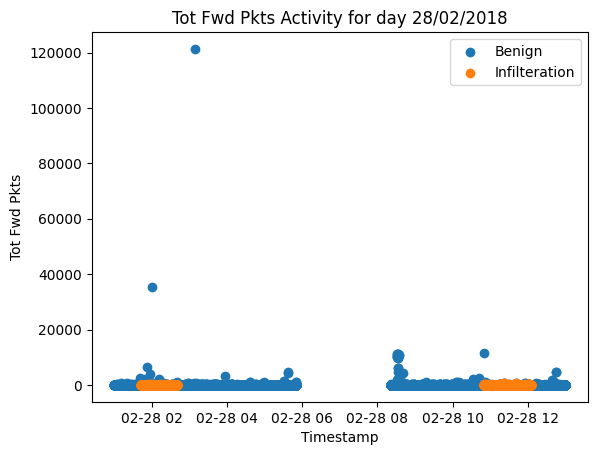

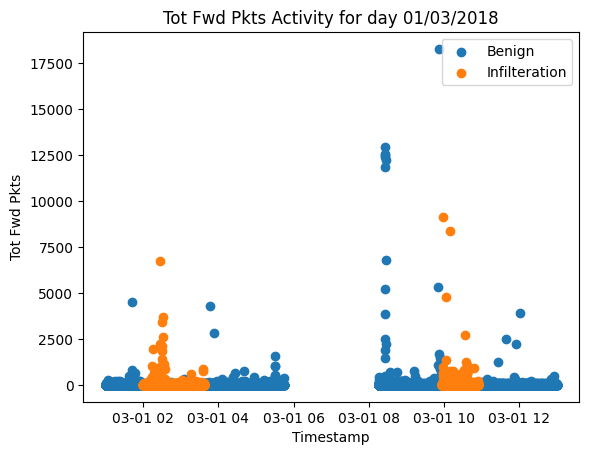

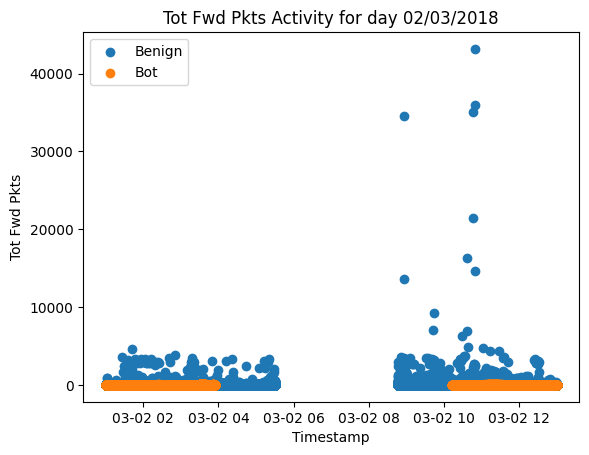

In [ ]:
date_str = ['14/02/2018', '21/02/2018', '22/02/2018', '23/02/2018', '28/02/2018', '01/03/2018', '02/03/2018']
for day in date_str:
  datetime_object = datetime.strptime(day, '%d/%m/%Y').date()
  df_data_this_day = df_data_dt_cleaned.loc[df_data_dt_cleaned['Date']==datetime_object]
  df_data_this_day['Tot Fwd Pkts'] = df_data_this_day['Tot Fwd Pkts'].apply(custom_convert)
  plt.figure()
  for label in df_data_this_day['Label'].unique():
    plt.scatter(df_data_this_day.loc[df_data_this_day['Label'] == label]['Timestamp'], df_data_this_day.loc[df_data_this_day['Label'] == label]['Tot Fwd Pkts'], label=label)
  plt.legend()
  plt.xlabel('Timestamp')
  plt.ylabel('Tot Fwd Pkts')
  plt.title('Tot Fwd Pkts Activity for day '+str(day))
plt.show()

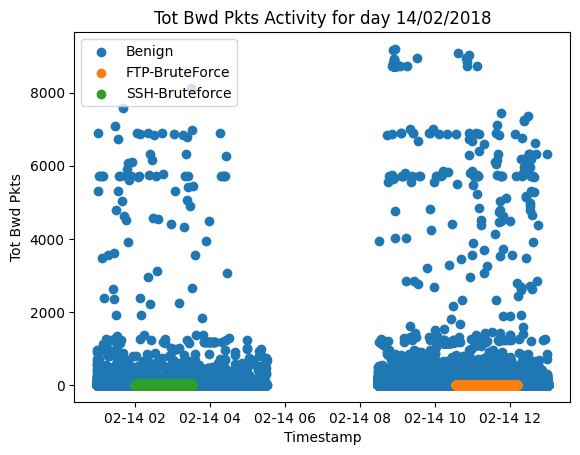

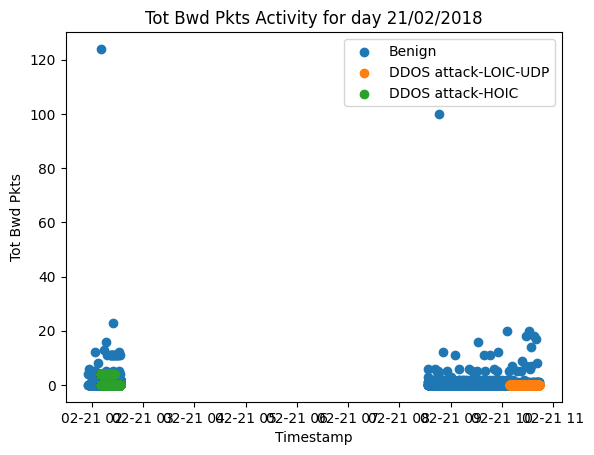

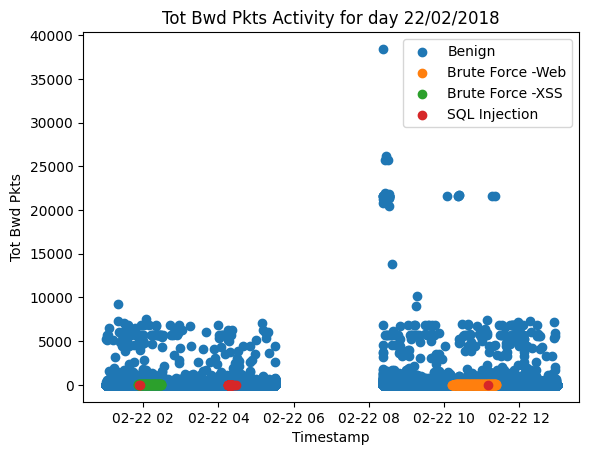

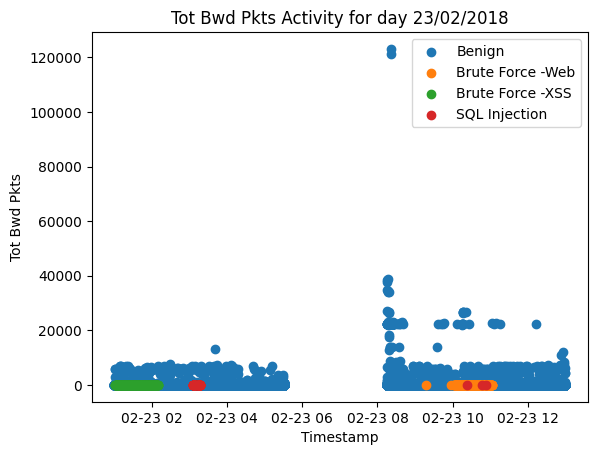

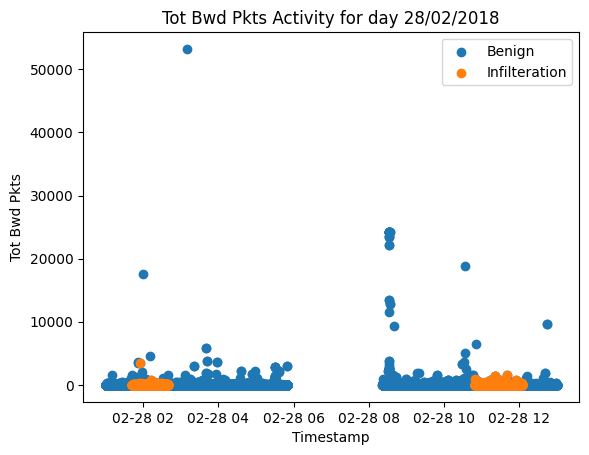

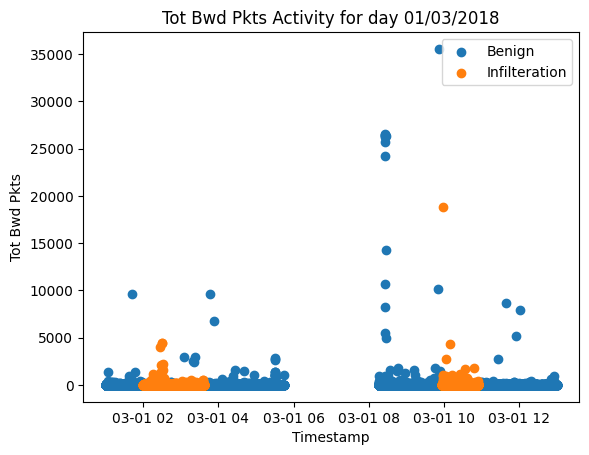

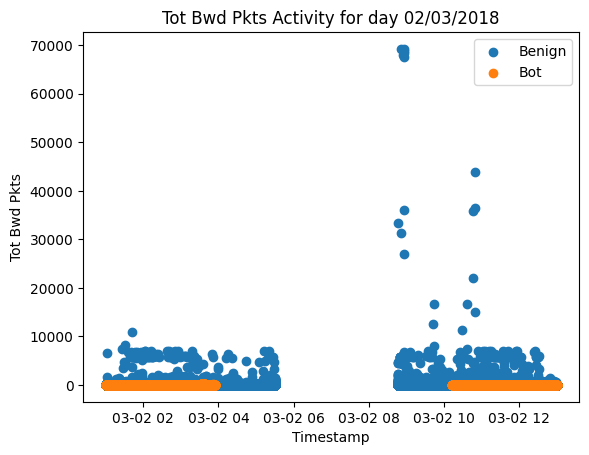

In [ ]:
date_str = ['14/02/2018', '21/02/2018', '22/02/2018', '23/02/2018', '28/02/2018', '01/03/2018', '02/03/2018']
for day in date_str:
  datetime_object = datetime.strptime(day, '%d/%m/%Y').date()
  df_data_this_day = df_data_dt_cleaned.loc[df_data_dt_cleaned['Date']==datetime_object]
  df_data_this_day['Tot Bwd Pkts'] = df_data_this_day['Tot Bwd Pkts'].apply(custom_convert)
  plt.figure()
  for label in df_data_this_day['Label'].unique():
    plt.scatter(df_data_this_day.loc[df_data_this_day['Label'] == label]['Timestamp'], df_data_this_day.loc[df_data_this_day['Label'] == label]['Tot Bwd Pkts'], label=label)
  plt.legend()
  plt.xlabel('Timestamp')
  plt.ylabel('Tot Bwd Pkts')
  plt.title('Tot Bwd Pkts Activity for day '+str(day))
plt.show()

* Pie chart representing the most used ports in Benign activity

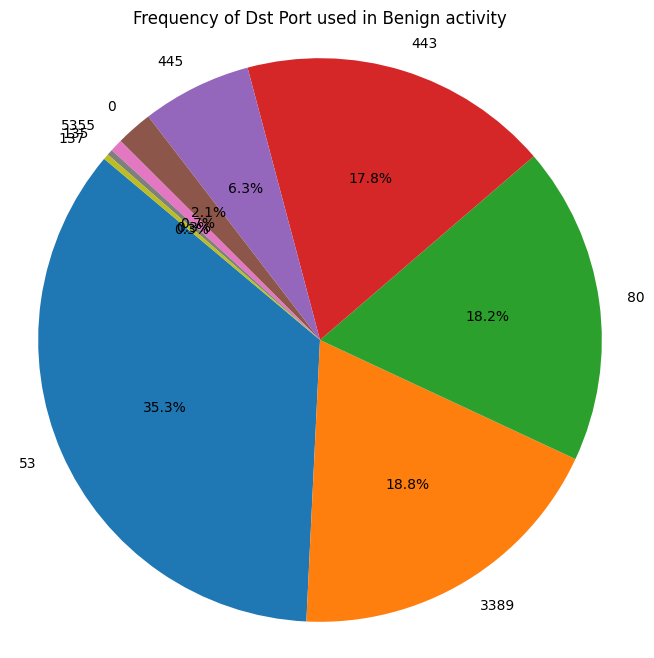

In [ ]:
# Calculate the frequency of each unique value in the column
value_counts = df_benign['Dst Port'].astype(int).value_counts()
value_counts = value_counts.loc[value_counts  > 10000]

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Dst Port used in Benign activity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Definition of Attack dataset and of a sample for Benign activity dataset

In [21]:
df_attack = df_data.loc[df_data['Label'] != 'Benign']

df_benign_sample = df_benign.sample(n=1000000, random_state=1)

In [22]:
df_attack = df_attack[df_attack['Dst Port'].apply(lambda x: is_int(x))]

* Pie chart representing the most used ports in Malicious activity

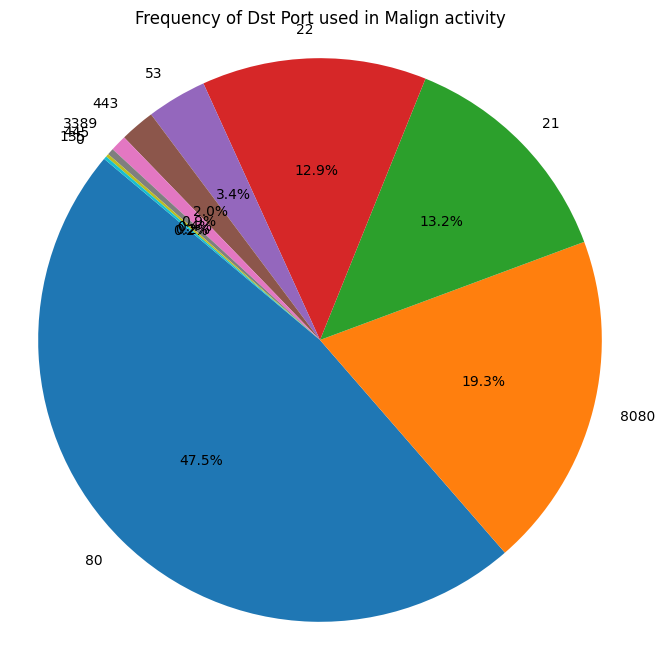

In [ ]:
value_counts = df_attack['Dst Port'].astype(int).value_counts()
value_counts = value_counts.loc[value_counts  > 1000]

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Dst Port used in Malign activity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
attack_type = df_attack['Label'].unique().tolist()
print(attack_type)

['FTP-BruteForce', 'SSH-Bruteforce', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Infilteration', 'Bot']


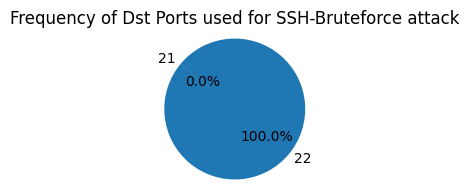

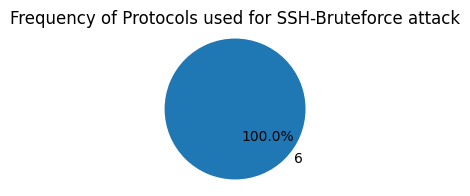

In [ ]:
attack = 'SSH-Bruteforce'

attack_num = attack_type.index(attack)
# Calculate the frequency of each unique value in the column
value_counts1 = df_attack['Dst Port'].loc[df_attack['Label']==attack_type[attack_num]].astype(int).value_counts()
value_counts2 = df_attack['Protocol'].loc[df_attack['Label']==attack_type[attack_num]].astype(int).value_counts()
# Plotting a pie chart
plt.figure(figsize=(2, 2))
plt.pie(value_counts1, labels=value_counts1.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Dst Ports used for '+attack+' attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.figure(figsize=(2, 2))
plt.pie(value_counts2, labels=value_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Protocols used for '+attack+' attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Search for correlations between Flow Duration, Tot Fwd Pkts and Tot Bwd Pkts

In [23]:
df_benign['Flow Duration'] = df_benign['Flow Duration'].apply(custom_convert)
df_attack['Flow Duration'] = df_attack['Flow Duration'].apply(custom_convert)
flow_duration_benign = df_benign.loc[df_benign['Flow Duration'] > 0][['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']]
flow_duration_malign = df_attack.loc[df_attack['Flow Duration'] > 0][['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']]

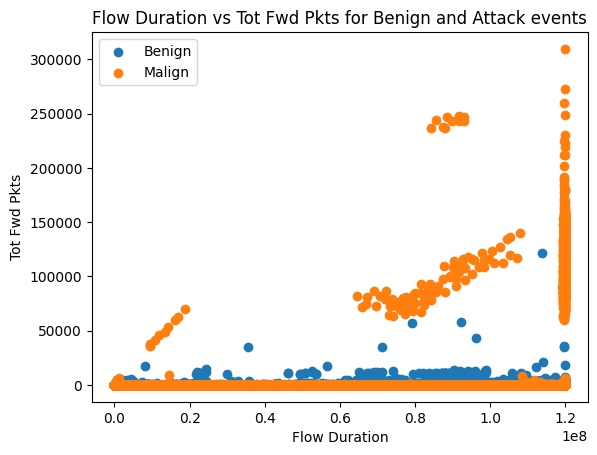

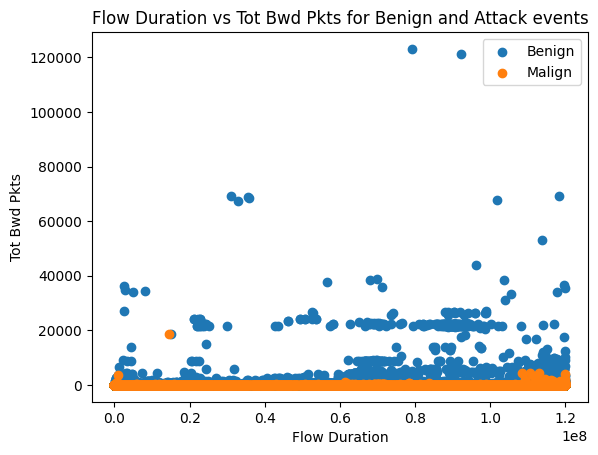

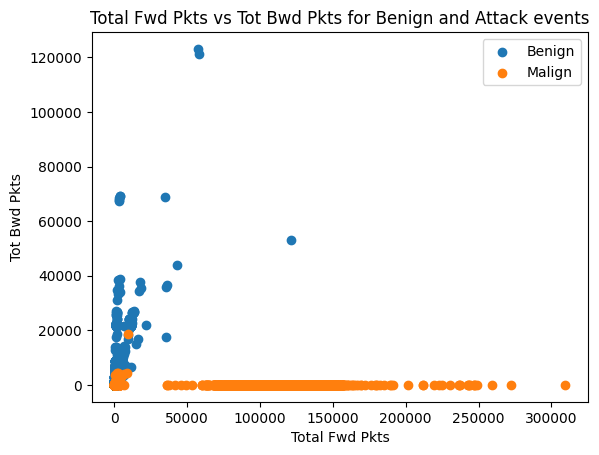

In [ ]:
plt.figure()
plt.scatter(flow_duration_benign['Flow Duration'], flow_duration_benign['Tot Fwd Pkts'], label='Benign')
plt.scatter(flow_duration_malign['Flow Duration'], flow_duration_malign['Tot Fwd Pkts'], label='Malign')
plt.legend()
plt.xlabel('Flow Duration')
plt.ylabel('Tot Fwd Pkts')
plt.title('Flow Duration vs Tot Fwd Pkts for Benign and Attack events')

plt.figure()
plt.scatter(flow_duration_benign['Flow Duration'], flow_duration_benign['Tot Bwd Pkts'], label='Benign')
plt.scatter(flow_duration_malign['Flow Duration'], flow_duration_malign['Tot Bwd Pkts'], label='Malign')
plt.legend()
plt.xlabel('Flow Duration')
plt.ylabel('Tot Bwd Pkts')
plt.title('Flow Duration vs Tot Bwd Pkts for Benign and Attack events')

plt.figure()

plt.scatter(df_benign['Tot Fwd Pkts'], df_benign['Tot Bwd Pkts'], label='Benign')
plt.scatter(df_attack['Tot Fwd Pkts'], df_attack['Tot Bwd Pkts'], label='Malign')
plt.legend()
plt.xlabel('Total Fwd Pkts')
plt.ylabel('Tot Bwd Pkts')
plt.title('Total Fwd Pkts vs Tot Bwd Pkts for Benign and Attack events')

plt.show()

In [38]:
pearson_benign_flow_FwdPkts = scipy.stats.pearsonr(flow_duration_benign['Flow Duration'].apply(custom_convert), flow_duration_benign['Tot Fwd Pkts'].apply(custom_convert))[0]
spearman_benign_flow_FwdPkts = scipy.stats.spearmanr(flow_duration_benign['Flow Duration'].apply(custom_convert), flow_duration_benign['Tot Fwd Pkts'].apply(custom_convert))[0]
pearson_malign_flow_FwdPkts = scipy.stats.pearsonr(flow_duration_malign['Flow Duration'].apply(custom_convert), flow_duration_malign['Tot Fwd Pkts'].apply(custom_convert))[0]
spearman_malign_flow_FwdPkts = scipy.stats.spearmanr(flow_duration_malign['Flow Duration'].apply(custom_convert), flow_duration_malign['Tot Fwd Pkts'].apply(custom_convert))[0]

print('Pearson Correlation Index between Flow Duration and Tot Fwd Pkts for benign activity: ', pearson_benign_flow_FwdPkts)
print('Spearman Correlation Index between Flow Duration and Tot Fwd Pkts for benign activity: ', spearman_benign_flow_FwdPkts)
print('Pearson Correlation Index between Flow Duration and Tot Fwd Pkts for malicious activity: ', pearson_malign_flow_FwdPkts)
print('Spearman Correlation Index between Flow Duration and Tot Fwd Pkts for malicious activity: ', spearman_malign_flow_FwdPkts)


Pearson Correlation Index between Flow Duration and Tot Fwd Pkts for benign activity:  0.05783693005759122
Spearman Correlation Index between Flow Duration and Tot Fwd Pkts for benign activity:  0.6452119255941127
Pearson Correlation Index between Flow Duration and Tot Fwd Pkts for malicious activity:  0.3307618367873622
Spearman Correlation Index between Flow Duration and Tot Fwd Pkts for malicious activity:  0.7819338775105283


In [39]:
pearson_benign_flow_BwdPkts = scipy.stats.pearsonr(flow_duration_benign['Flow Duration'].apply(custom_convert), flow_duration_benign['Tot Bwd Pkts'].apply(custom_convert))[0]
spearman_benign_flow_BwdPkts = scipy.stats.spearmanr(flow_duration_benign['Flow Duration'].apply(custom_convert), flow_duration_benign['Tot Bwd Pkts'].apply(custom_convert))[0]
pearson_malign_flow_BwdPkts = scipy.stats.pearsonr(flow_duration_malign['Flow Duration'].apply(custom_convert), flow_duration_malign['Tot Bwd Pkts'].apply(custom_convert))[0]
spearman_malign_flow_BwdPkts = scipy.stats.spearmanr(flow_duration_malign['Flow Duration'].apply(custom_convert), flow_duration_malign['Tot Bwd Pkts'].apply(custom_convert))[0]

print('Pearson Correlation Index between Flow Duration and Tot Bwd Pkts for benign activity: ', pearson_benign_flow_BwdPkts)
print('Spearman Correlation Index between Flow Duration and Tot Bwd Pkts for benign activity: ', spearman_benign_flow_BwdPkts)
print('Pearson Correlation Index between Flow Duration and Tot Bwd Pkts for malicious activity: ', pearson_malign_flow_BwdPkts)
print('Spearman Correlation Index between Flow Duration and Tot Bwd Pkts for malicious activity: ', spearman_malign_flow_BwdPkts)

Pearson Correlation Index between Flow Duration and Tot Bwd Pkts for benign activity:  0.05144535406767615
Spearman Correlation Index between Flow Duration and Tot Bwd Pkts for benign activity:  0.5053897780456179
Pearson Correlation Index between Flow Duration and Tot Bwd Pkts for malicious activity:  0.11476898395645162
Spearman Correlation Index between Flow Duration and Tot Bwd Pkts for malicious activity:  0.2573966913815874


In [40]:
pearson_benign_FwdPkts_BwdPkts = scipy.stats.pearsonr(flow_duration_benign['Tot Fwd Pkts'].apply(custom_convert), flow_duration_benign['Tot Bwd Pkts'].apply(custom_convert))[0]
spearman_benign_FwdPkts_BwdPkts = scipy.stats.spearmanr(flow_duration_benign['Tot Fwd Pkts'].apply(custom_convert), flow_duration_benign['Tot Bwd Pkts'].apply(custom_convert))[0]
pearson_malign_FwdPkts_BwdPkts = scipy.stats.pearsonr(flow_duration_malign['Tot Fwd Pkts'].apply(custom_convert), flow_duration_malign['Tot Bwd Pkts'].apply(custom_convert))[0]
spearman_malign_FwdPkts_BwdPkts = scipy.stats.spearmanr(flow_duration_malign['Tot Fwd Pkts'].apply(custom_convert), flow_duration_malign['Tot Bwd Pkts'].apply(custom_convert))[0]

print('Pearson Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for benign activity: ', pearson_benign_flow_BwdPkts)
print('Spearman Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for benign activity: ', spearman_benign_flow_BwdPkts)
print('Pearson Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for malicious activity: ', pearson_malign_flow_BwdPkts)
print('Spearman Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for malicious activity: ', spearman_malign_flow_BwdPkts)

Pearson Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for benign activity:  0.05144535406767615
Spearman Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for benign activity:  0.5053897780456179
Pearson Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for malicious activity:  0.11476898395645162
Spearman Correlation Index between Tot Fwd Pkts and Tot Bwd Pkts for malicious activity:  0.2573966913815874


## Classifier Model Building

### Data Preparation for Classification Model

Two different labels are created, in prevision of a binary and a multiple classification. The column Label contains the original labels from the dataset, with the classification of the different attacks and the benign activity. The column Label2 instead, divides the data sample in Benign and Malign activity, in order to build a binary classifier.

In [ ]:
print(len(df_attack), len(df_benign_sample))

1517744 1000000


In [41]:
df_data_sample = pd.concat([df_benign_sample, df_attack], axis=0, ignore_index=True)
df_data_sample = df_data_sample.sample(frac = 1).reset_index()

df_data_sample.head()

,index,Timestamp,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label,Date
0,97479,2018-02-22 10:22:28,3389,6,2357542,9,7,Benign,2018-02-22
1,566649,2018-02-23 05:24:45,3389,6,6430806,10,7,Benign,2018-02-23
2,1661609,2018-02-21 02:17:02,80,6,5513,2,0,DDOS attack-HOIC,2018-02-21
3,2466921,2018-03-02 11:39:38,8080,6,529,2,0,Bot,2018-03-02
4,2493800,2018-03-02 11:22:27,8080,6,594,2,0,Bot,2018-03-02


In [42]:
df_data_sample['Label2'] = [i if i == 'Benign' else 'Malign' for i in df_data_sample['Label']]
df_data_sample.head()

,index,Timestamp,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label,Date,Label2
0,97479,2018-02-22 10:22:28,3389,6,2357542,9,7,Benign,2018-02-22,Benign
1,566649,2018-02-23 05:24:45,3389,6,6430806,10,7,Benign,2018-02-23,Benign
2,1661609,2018-02-21 02:17:02,80,6,5513,2,0,DDOS attack-HOIC,2018-02-21,Malign
3,2466921,2018-03-02 11:39:38,8080,6,529,2,0,Bot,2018-03-02,Malign
4,2493800,2018-03-02 11:22:27,8080,6,594,2,0,Bot,2018-03-02,Malign


In [43]:
df_data_sample_cleaned = df_data_sample[df_data_sample['Dst Port'].apply(lambda x: is_int(x))]

In [44]:
columns = df_data_sample_cleaned.columns
for column in columns[2:-3]:
  df_data_sample_cleaned[column] = df_data_sample_cleaned[column].apply(custom_convert)

df_data_sample_cleaned.head()

,index,Timestamp,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label,Date,Label2
0,97479,2018-02-22 10:22:28,3389,6,2357542,9,7,Benign,2018-02-22,Benign
1,566649,2018-02-23 05:24:45,3389,6,6430806,10,7,Benign,2018-02-23,Benign
2,1661609,2018-02-21 02:17:02,80,6,5513,2,0,DDOS attack-HOIC,2018-02-21,Malign
3,2466921,2018-03-02 11:39:38,8080,6,529,2,0,Bot,2018-03-02,Malign
4,2493800,2018-03-02 11:22:27,8080,6,594,2,0,Bot,2018-03-02,Malign


Text(0.5, 1.0, 'Benign vs Malign proportion in sample')

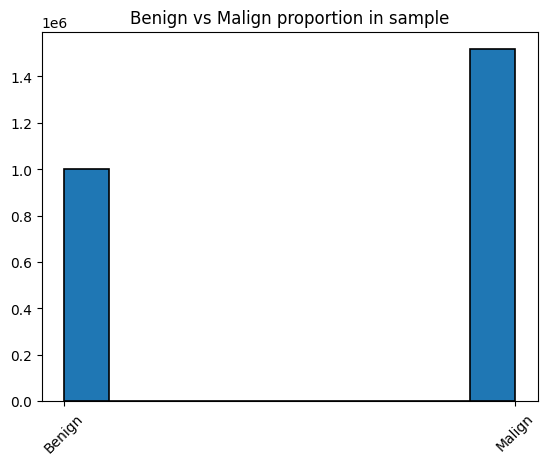

In [58]:
df_data_sample_cleaned['Label2'].hist(xrot=45, edgecolor='black', linewidth=1.2, grid=False)
plt.title('Benign vs Malign proportion in sample')

Text(0.5, 1.0, 'Labels proportion in sample')

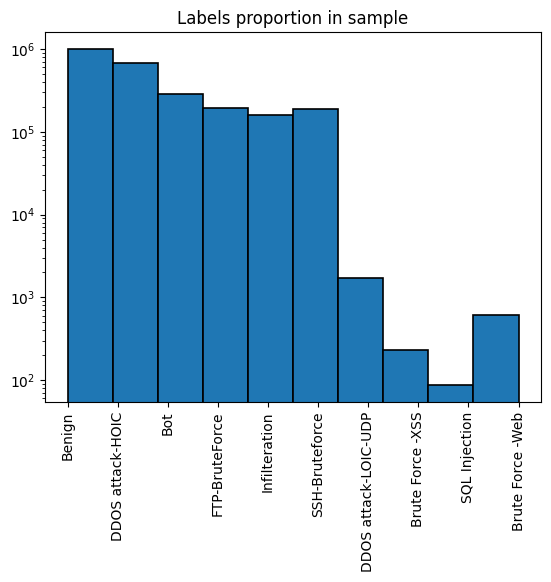

In [56]:
df_data_sample_cleaned['Label'].hist(xrot=90, edgecolor='black', linewidth=1.2, log=True, grid=False)
plt.title('Labels proportion in sample')

* Flow Duration distribution for the different types of activity.

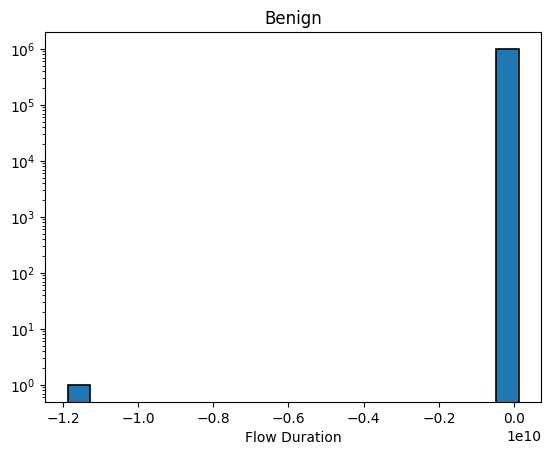

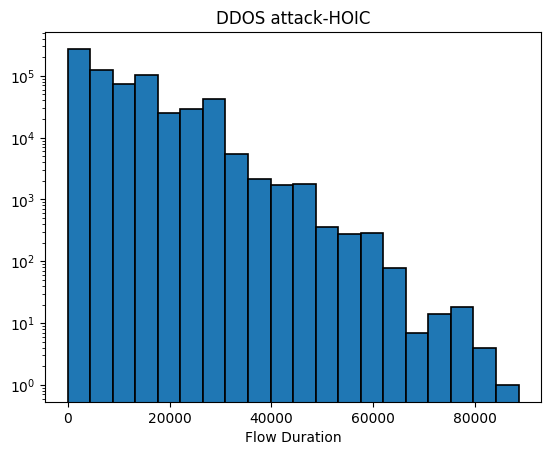

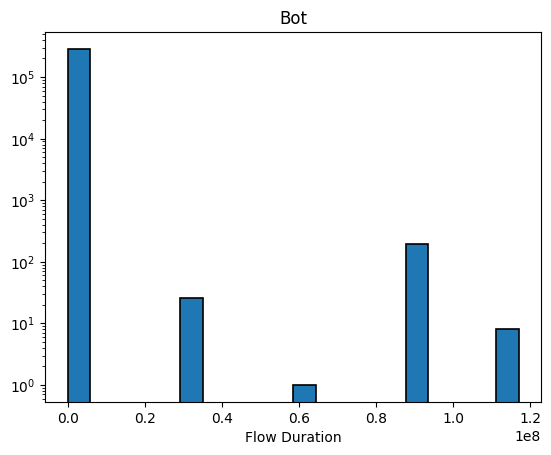

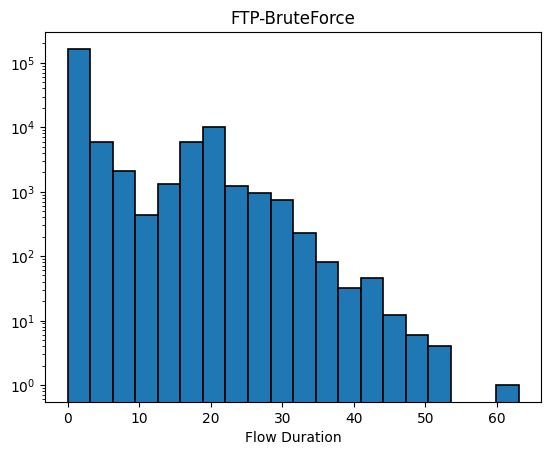

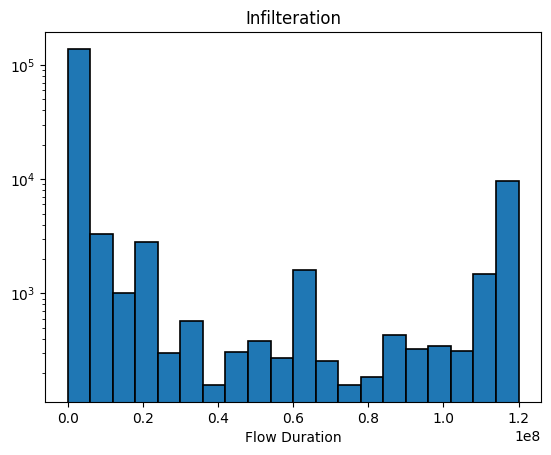

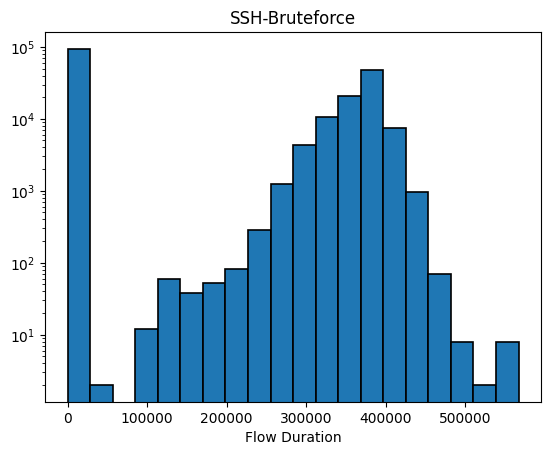

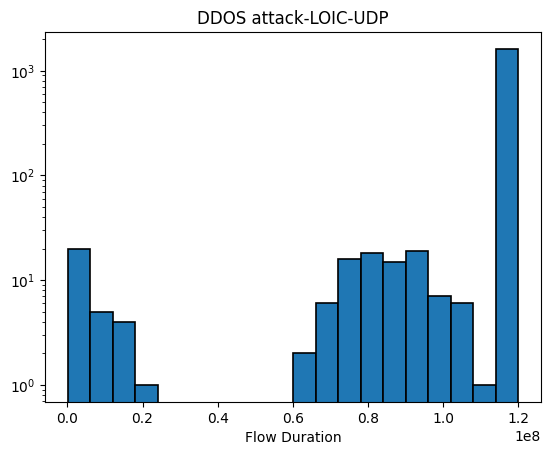

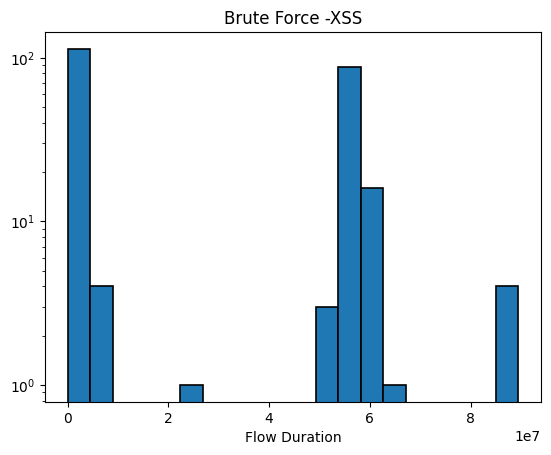

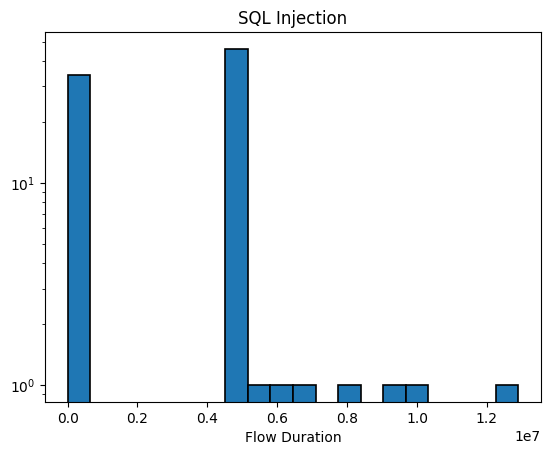

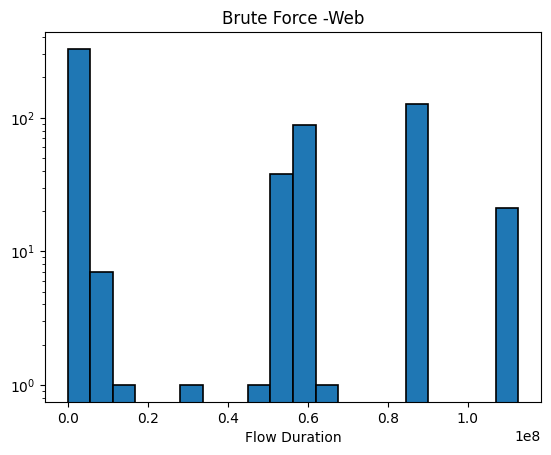

In [59]:
for label in df_data_sample_cleaned['Label'].unique():
  plt.figure()
  plt.title(label)
  plt.hist(df_data_sample_cleaned.loc[df_data_sample_cleaned['Label']==label]['Flow Duration'], bins=20, edgecolor='black', linewidth=1.2)
  plt.yscale('log')
  plt.xlabel('Flow Duration')

plt.show()

### Random Forest Binary Classifier

In [ ]:
# Splitting the dataset into training and testing sets
X = df_data_sample_cleaned.drop(columns=['index', 'Label', 'Label2', 'Date', 'Timestamp'])
y = df_data_sample_cleaned['Label2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding string labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train_encoded)

# Predicting on the test set
predictions = rf_classifier.predict(X_test)

# Decode numerical predictions back to string labels
predictions_decoded = label_encoder.inverse_transform(predictions)

# Evaluating the model
print(classification_report(y_test, predictions_decoded))

              precision    recall  f1-score   support

      Benign       0.89      0.93      0.91    199713
      Malign       0.95      0.92      0.94    303836

    accuracy                           0.93    503549
   macro avg       0.92      0.93      0.92    503549
weighted avg       0.93      0.93      0.93    503549



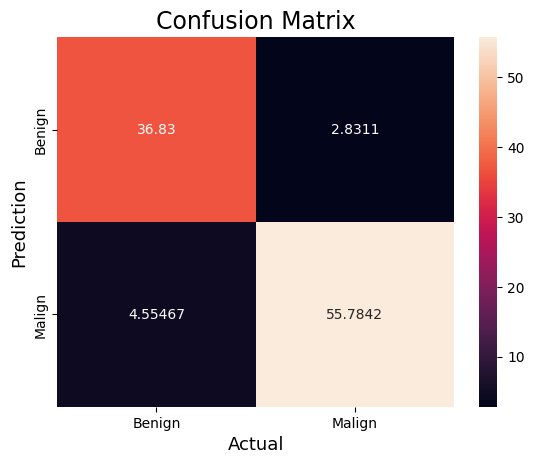

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions_decoded)

sns.heatmap((confusion_matrix/len(y_test))*100,
            annot=True,
            fmt='g',
            xticklabels=['Benign','Malign'],
            yticklabels=['Benign','Malign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

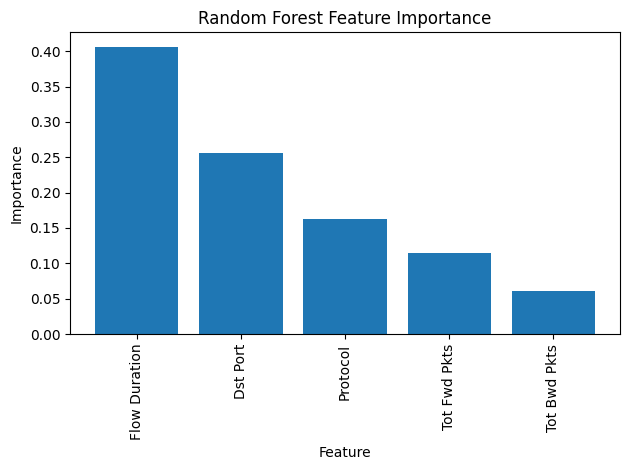

In [ ]:
# Extract feature importance from the trained classifier
feature_importance = rf_classifier.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Extract feature names
feature_names = X.columns#[f"Feature {i}" for i in range(X.shape[1])]  # Replace with actual feature names if available

# Plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

### Random Forest Multiple Classifier

In [ ]:
# Splitting the dataset into training and testing sets
X = df_data_sample_cleaned.drop(columns=['index', 'Label', 'Label2', 'Date', 'Timestamp'])
y = df_data_sample_cleaned['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding string labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train_encoded)

# Predicting on the test set
predictions = rf_classifier.predict(X_test)

# Decode numerical predictions back to string labels
predictions_decoded = label_encoder.inverse_transform(predictions)

# Evaluating the model
print(classification_report(y_test, predictions_decoded))

                      precision    recall  f1-score   support

              Benign       0.89      0.93      0.91    199713
                 Bot       1.00      1.00      1.00     57387
    Brute Force -Web       0.78      0.42      0.55       139
    Brute Force -XSS       0.74      0.53      0.62        47
    DDOS attack-HOIC       0.99      1.00      0.99    137357
DDOS attack-LOIC-UDP       1.00      1.00      1.00       335
      FTP-BruteForce       1.00      1.00      1.00     38858
       Infilteration       0.43      0.30      0.35     31976
       SQL Injection       0.62      0.56      0.59        18
      SSH-Bruteforce       1.00      1.00      1.00     37719

            accuracy                           0.93    503549
           macro avg       0.84      0.77      0.80    503549
        weighted avg       0.92      0.93      0.92    503549



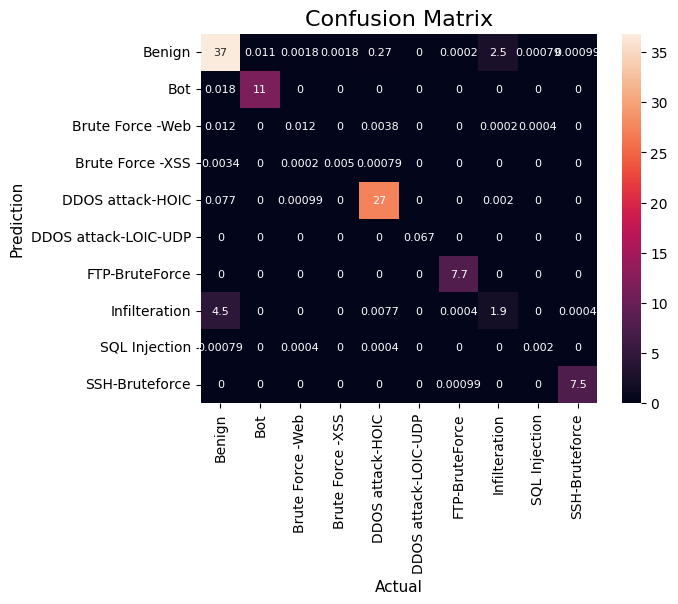

In [ ]:
cm_labels = np.unique(y_test)
cm_array = metrics.confusion_matrix(y_test, predictions_decoded)
cm_array_df = pd.DataFrame((cm_array/len(y_test))*100, index=cm_labels, columns=cm_labels)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 8})
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

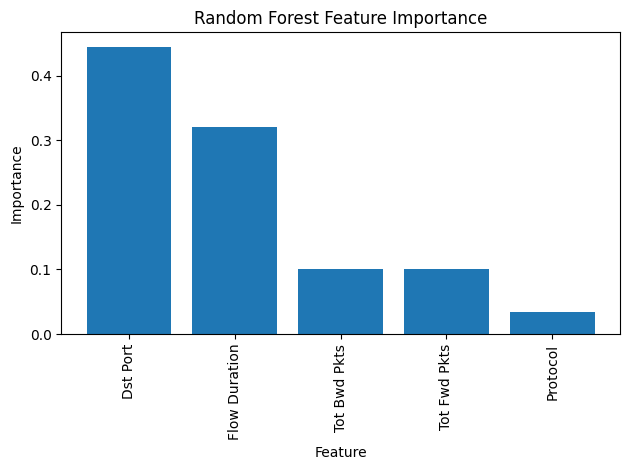

In [ ]:
# Extract feature importance from the trained classifier
feature_importance = rf_classifier.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Extract feature names
feature_names = X.columns#[f"Feature {i}" for i in range(X.shape[1])]  # Replace with actual feature names if available

# Plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

### Autoencoding of Features - Data Transformation and Model Building

In [ ]:
def data_transformation(X,y):
  # Encode categorical labels
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)

  # Normalize the feature matrix using Min-Max normalization
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test, X_scaled, y_encoded

def build_run_model(X_train, X_test, y_train, y_test, X_scaled):
  # Define the dimensions
  input_dim = X_train.shape[1]  # Number of features
  latent_dim = 2  # Number of dimensions in the latent space

  # Define the autoencoder model
  input_layer = tf.keras.layers.Input(shape=(input_dim,))
  encoder = tf.keras.layers.Dense(64, activation='relu')(input_layer)
  encoder = tf.keras.layers.Dense(latent_dim, activation='relu')(encoder)

  decoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
  decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder)

  autoencoder = tf.keras.models.Model(input_layer, decoder)

  # Compile the model
  autoencoder.compile(optimizer='adam', loss='mse')

  # Train the autoencoder
  history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

  # Encode the data into the latent space
  encoder_model = tf.keras.models.Model(input_layer, encoder)
  X_encoded = encoder_model.predict(X_scaled)

  return X_encoded, encoder_model

### Autoencoding of Datasets Separately

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-14-2018.csv')
data1.dropna(inplace=True)
X1 = data1.drop(columns=['Label', 'Timestamp'])
y1 = data1['Label']
X1 = X1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
del data1

In [ ]:
X_train1, X_test1, y_train1, y_test1, X_scaled1, y_encoded1  = data_transformation(X1, y1)
X_encoded1, encoder_model1 = build_run_model(X_train1, X_test1, y_train1, y_test1, X_scaled1)
np.save('/content/drive/MyDrive/DataSecurity/02-14-2018_encoded.npy', X_encoded1)

Epoch 1/10
20926/20926 [==============================] - 85s 4ms/step - loss: 0.0019 - val_loss: 4.6446e-04
Epoch 2/10
20926/20926 [==============================] - 94s 4ms/step - loss: 4.0219e-04 - val_loss: 3.7136e-04
Epoch 3/10
20926/20926 [==============================] - 62s 3ms/step - loss: 3.5541e-04 - val_loss: 3.3461e-04
Epoch 4/10
20926/20926 [==============================] - 56s 3ms/step - loss: 3.3718e-04 - val_loss: 3.2397e-04
Epoch 5/10
20926/20926 [==============================] - 57s 3ms/step - loss: 3.3055e-04 - val_loss: 3.1137e-04
Epoch 6/10
20926/20926 [==============================] - 58s 3ms/step - loss: 3.2268e-04 - val_loss: 3.1236e-04
Epoch 7/10
20926/20926 [==============================] - 60s 3ms/step - loss: 3.1719e-04 - val_loss: 3.0340e-04
Epoch 8/10
20926/20926 [==============================] - 57s 3ms/step - loss: 3.1441e-04 - val_loss: 3.0078e-04
Epoch 9/10
20926/20926 [==============================] - 56s 3ms/step - loss: 3.1128e-04 - val_loss

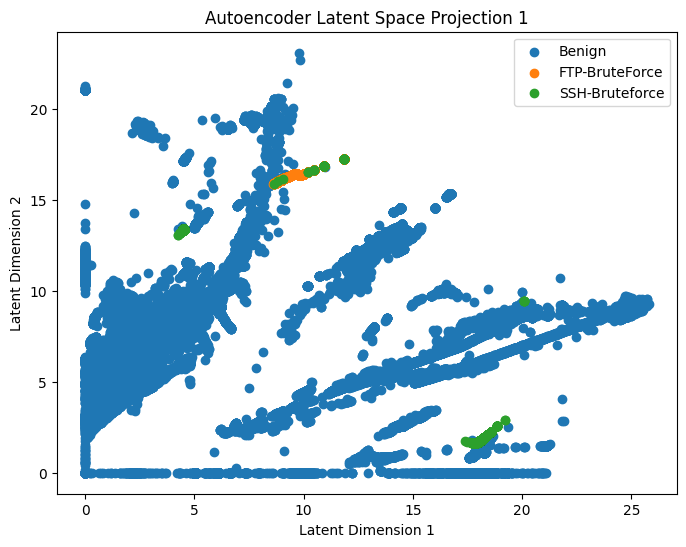

In [ ]:
# Get unique labels
unique_labels1 = np.unique(y_encoded1)
decoded_labels1 = np.unique(y1)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels1, decoded_labels1):
    indices = np.where(y_encoded1 == label)[0]
    plt.scatter(X_encoded1[indices, 0], X_encoded1[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 1')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-21-2018.csv')
data2.dropna(inplace=True)
X2 = data2.drop(columns=['Label', 'Timestamp'])
y2 = data2['Label']
X2 = X2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
del data2

In [ ]:
X_train2, X_test2, y_train2, y_test2, X_scaled2, y_encoded2 = data_transformation(X2, y2)
X_encoded2, encoder_model2 = build_run_model(X_train2, X_test2, y_train2, y_test2, X_scaled2)
np.save('/content/drive/MyDrive/DataSecurity/02-21-2018_encoded.npy', X_encoded2)

Epoch 1/10
20972/20972 [==============================] - 66s 3ms/step - loss: 7.7458e-04 - val_loss: 1.0836e-04
Epoch 2/10
20972/20972 [==============================] - 63s 3ms/step - loss: 1.0267e-04 - val_loss: 9.9482e-05
Epoch 3/10
20972/20972 [==============================] - 63s 3ms/step - loss: 9.9940e-05 - val_loss: 1.3469e-04
Epoch 4/10
20972/20972 [==============================] - 62s 3ms/step - loss: 9.8102e-05 - val_loss: 9.6931e-05
Epoch 5/10
20972/20972 [==============================] - 61s 3ms/step - loss: 9.6154e-05 - val_loss: 9.5142e-05
Epoch 6/10
20972/20972 [==============================] - 63s 3ms/step - loss: 3.5768e-05 - val_loss: 2.1170e-05
Epoch 7/10
20972/20972 [==============================] - 58s 3ms/step - loss: 2.2599e-05 - val_loss: 2.0782e-05
Epoch 8/10
20972/20972 [==============================] - 59s 3ms/step - loss: 2.0471e-05 - val_loss: 1.8578e-05
Epoch 9/10
20972/20972 [==============================] - 60s 3ms/step - loss: 1.9770e-05 - val_

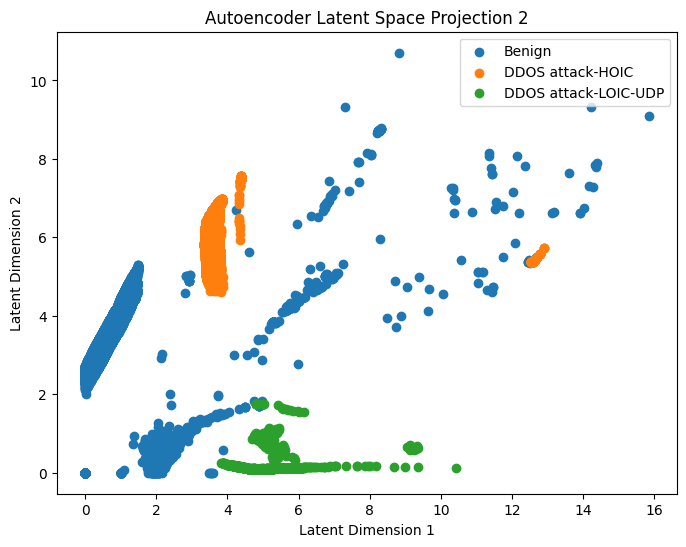

In [ ]:
# Get unique labels
unique_labels2 = np.unique(y_encoded2)
decoded_labels2 = np.unique(y2)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels2, decoded_labels2):
    indices = np.where(y_encoded2 == label)[0]
    plt.scatter(X_encoded2[indices, 0], X_encoded2[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 2')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-22-2018.csv')
data3.dropna(inplace=True)
X3 = data3.drop(columns=['Label', 'Timestamp'])
y3 = data3['Label']
X3 = X3.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
del data3

In [ ]:
X_train3, X_test3, y_train3, y_test3, X_scaled3, y_encoded3 = data_transformation(X3, y3)
X_encoded3, encoder_model3 = build_run_model(X_train3, X_test3, y_train3, y_test3, X_scaled3)
np.save('/content/drive/MyDrive/DataSecurity/02-22-2018_encoded.npy', X_encoded3)

Epoch 1/10
20901/20901 [==============================] - 63s 3ms/step - loss: 0.0018 - val_loss: 7.1086e-04
Epoch 2/10
20901/20901 [==============================] - 62s 3ms/step - loss: 6.5852e-04 - val_loss: 6.0220e-04
Epoch 3/10
20901/20901 [==============================] - 67s 3ms/step - loss: 5.7495e-04 - val_loss: 5.5971e-04
Epoch 4/10
20901/20901 [==============================] - 64s 3ms/step - loss: 5.5306e-04 - val_loss: 5.7785e-04
Epoch 5/10
20901/20901 [==============================] - 64s 3ms/step - loss: 5.3320e-04 - val_loss: 5.2417e-04
Epoch 6/10
20901/20901 [==============================] - 63s 3ms/step - loss: 5.2169e-04 - val_loss: 5.1880e-04
Epoch 7/10
20901/20901 [==============================] - 62s 3ms/step - loss: 4.9296e-04 - val_loss: 4.6797e-04
Epoch 8/10
20901/20901 [==============================] - 65s 3ms/step - loss: 4.5502e-04 - val_loss: 4.4281e-04
Epoch 9/10
20901/20901 [==============================] - 62s 3ms/step - loss: 4.2906e-04 - val_loss

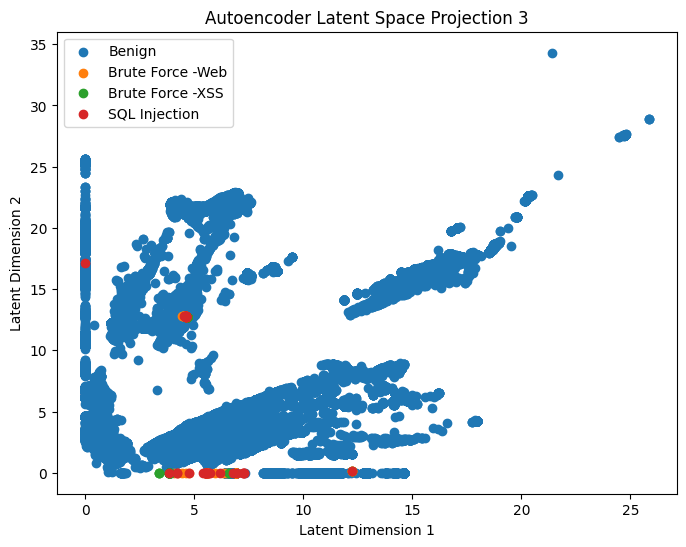

In [ ]:
# Get unique labels
unique_labels3 = np.unique(y_encoded3)
decoded_labels3 = np.unique(y3)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels3, decoded_labels3):
    indices = np.where(y_encoded3 == label)[0]
    plt.scatter(X_encoded3[indices, 0], X_encoded3[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 3')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-23-2018.csv')
data4.dropna(inplace=True)
X4 = data4.drop(columns=['Label', 'Timestamp'])
y4 = data4['Label']
X4 = X4.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
del data4

In [ ]:
X_train4, X_test4, y_train4, y_test4, X_scaled4, y_encoded4 = data_transformation(X4, y4)
X_encoded4, encoder_model4 = build_run_model(X_train4, X_test4, y_train4, y_test4, X_scaled4)
np.save('/content/drive/MyDrive/DataSecurity/02-23-2018_encoded.npy', X_encoded4)

Epoch 1/10
20897/20897 [==============================] - 67s 3ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 2/10
20897/20897 [==============================] - 70s 3ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 3/10
20897/20897 [==============================] - 69s 3ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4/10
20897/20897 [==============================] - 66s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/10
20897/20897 [==============================] - 66s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/10
20897/20897 [==============================] - 77s 4ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 7/10
20897/20897 [==============================] - 69s 3ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/10
20897/20897 [==============================] - 67s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/10
20897/20897 [==============================] - 67s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/10
32651/32651 [==============================

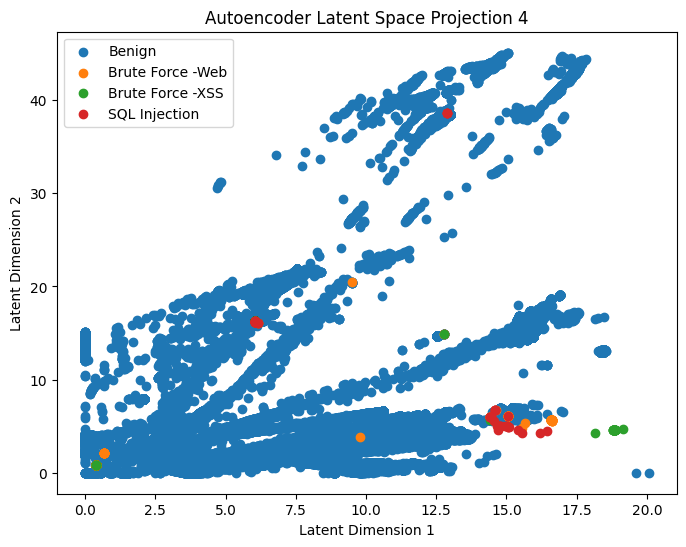

In [ ]:
# Get unique labels
unique_labels4 = np.unique(y_encoded4)
decoded_labels4 = np.unique(y4)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels4, decoded_labels4):
    indices = np.where(y_encoded4 == label)[0]
    plt.scatter(X_encoded4[indices, 0], X_encoded4[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 4')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data5 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-28-2018.csv')
data5.dropna(inplace=True)

data5 = data5.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data5 = data5[data5['Dst Port'].apply(lambda x: is_int(x))]
for column in data5.columns:
  data5[column] = data5[column].apply(custom_convert)
data5 = data5.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    label = df['Label']
    df = df.drop(columns=['Label', 'Timestamp'])
    df.dropna(inplace=True)
    # Convert infinities to NaN, then drop rows with any NaN values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    features = df[indices_to_keep].astype(np.float64).round(2)
    label = label[indices_to_keep]
    df = pd.concat([features, label], axis=1)
    return df.reset_index(drop=True)

data5 = clean_dataset(data5)

X5 = data5.drop(columns=['Label'])
y5 = data5['Label']

del data5

In [ ]:
print(X5.describe().loc[['max']].to_markdown())

|     |   Dst Port |   Protocol |   Flow Duration |   Tot Fwd Pkts |   Tot Bwd Pkts |   TotLen Fwd Pkts |   TotLen Bwd Pkts |   Fwd Pkt Len Max |   Fwd Pkt Len Min |   Fwd Pkt Len Mean |   Fwd Pkt Len Std |   Bwd Pkt Len Max |   Bwd Pkt Len Min |   Bwd Pkt Len Mean |   Bwd Pkt Len Std |   Flow Byts/s |   Flow Pkts/s |   Flow IAT Mean |   Flow IAT Std |   Flow IAT Max |   Flow IAT Min |   Fwd IAT Tot |   Fwd IAT Mean |   Fwd IAT Std |   Fwd IAT Max |   Fwd IAT Min |   Bwd IAT Tot |   Bwd IAT Mean |   Bwd IAT Std |   Bwd IAT Max |   Bwd IAT Min |   Fwd PSH Flags |   Bwd PSH Flags |   Fwd URG Flags |   Bwd URG Flags |   Fwd Header Len |   Bwd Header Len |   Fwd Pkts/s |   Bwd Pkts/s |   Pkt Len Min |   Pkt Len Max |   Pkt Len Mean |   Pkt Len Std |   Pkt Len Var |   FIN Flag Cnt |   SYN Flag Cnt |   RST Flag Cnt |   PSH Flag Cnt |   ACK Flag Cnt |   URG Flag Cnt |   CWE Flag Count |   ECE Flag Cnt |   Down/Up Ratio |   Pkt Size Avg |   Fwd Seg Size Avg |   Bwd Seg Size Avg |   Fwd Byts/b 

In [ ]:
X5['Flow Byts/s'] = X5['Flow Byts/s'].replace((np.inf, -np.inf, np.nan), 0)
X5['Flow Pkts/s'] = X5['Flow Pkts/s'].replace((np.inf, -np.inf, np.nan), 0)

In [ ]:
print(X5.describe().loc[['max']].to_markdown())

|     |   Dst Port |   Protocol |   Flow Duration |   Tot Fwd Pkts |   Tot Bwd Pkts |   TotLen Fwd Pkts |   TotLen Bwd Pkts |   Fwd Pkt Len Max |   Fwd Pkt Len Min |   Fwd Pkt Len Mean |   Fwd Pkt Len Std |   Bwd Pkt Len Max |   Bwd Pkt Len Min |   Bwd Pkt Len Mean |   Bwd Pkt Len Std |   Flow Byts/s |   Flow Pkts/s |   Flow IAT Mean |   Flow IAT Std |   Flow IAT Max |   Flow IAT Min |   Fwd IAT Tot |   Fwd IAT Mean |   Fwd IAT Std |   Fwd IAT Max |   Fwd IAT Min |   Bwd IAT Tot |   Bwd IAT Mean |   Bwd IAT Std |   Bwd IAT Max |   Bwd IAT Min |   Fwd PSH Flags |   Bwd PSH Flags |   Fwd URG Flags |   Bwd URG Flags |   Fwd Header Len |   Bwd Header Len |   Fwd Pkts/s |   Bwd Pkts/s |   Pkt Len Min |   Pkt Len Max |   Pkt Len Mean |   Pkt Len Std |   Pkt Len Var |   FIN Flag Cnt |   SYN Flag Cnt |   RST Flag Cnt |   PSH Flag Cnt |   ACK Flag Cnt |   URG Flag Cnt |   CWE Flag Count |   ECE Flag Cnt |   Down/Up Ratio |   Pkt Size Avg |   Fwd Seg Size Avg |   Bwd Seg Size Avg |   Fwd Byts/b 

In [ ]:
X_train5, X_test5, y_train5, y_test5, X_scaled5, y_encoded5 = data_transformation(X5, y5)
X_encoded5, encoder_model5 = build_run_model(X_train5, X_test5, y_train5, y_test5, X_scaled5)
np.save('/content/drive/MyDrive/DataSecurity/02-28-2018_encoded.npy', X_encoded5)

Epoch 1/10
12181/12181 [==============================] - 50s 4ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 2/10
12181/12181 [==============================] - 37s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
12181/12181 [==============================] - 33s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
12181/12181 [==============================] - 29s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
12181/12181 [==============================] - 29s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
12181/12181 [==============================] - 31s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
12181/12181 [==============================] - 29s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/10
12181/12181 [==============================] - 28s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/10
12181/12181 [==============================] - 30s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/10
19033/19033 [==============================

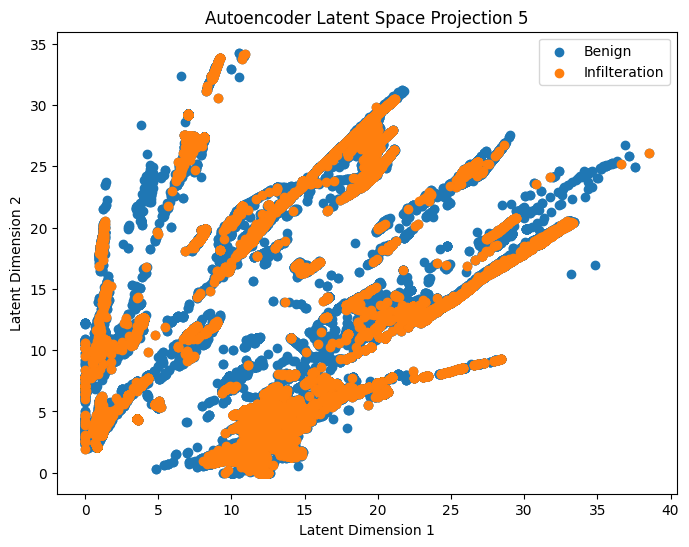

In [ ]:
# Get unique labels
unique_labels5 = np.unique(y_encoded5)
decoded_labels5 = np.unique(y5)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels5, decoded_labels5):
    indices = np.where(y_encoded5 == label)[0]
    plt.scatter(X_encoded5[indices, 0], X_encoded5[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 5')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data6 = pd.read_csv('/content/drive/MyDrive/DataSecurity/03-01-2018.csv')

data6.dropna(inplace=True)

data6 = data6.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data6 = data6[data6['Dst Port'].apply(lambda x: is_int(x))]
for column in data6.columns:
  data6[column] = data6[column].apply(custom_convert)
data6 = data6.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data6 = clean_dataset(data6)

X6 = data6.drop(columns=['Label'])
y6 = data6['Label']

del data6

In [ ]:
print(X6.describe().loc[['max']].to_markdown())

|     |   Dst Port |   Protocol |   Flow Duration |   Tot Fwd Pkts |   Tot Bwd Pkts |   TotLen Fwd Pkts |   TotLen Bwd Pkts |   Fwd Pkt Len Max |   Fwd Pkt Len Min |   Fwd Pkt Len Mean |   Fwd Pkt Len Std |   Bwd Pkt Len Max |   Bwd Pkt Len Min |   Bwd Pkt Len Mean |   Bwd Pkt Len Std |   Flow Byts/s |   Flow Pkts/s |   Flow IAT Mean |   Flow IAT Std |   Flow IAT Max |   Flow IAT Min |   Fwd IAT Tot |   Fwd IAT Mean |   Fwd IAT Std |   Fwd IAT Max |   Fwd IAT Min |   Bwd IAT Tot |   Bwd IAT Mean |   Bwd IAT Std |   Bwd IAT Max |   Bwd IAT Min |   Fwd PSH Flags |   Bwd PSH Flags |   Fwd URG Flags |   Bwd URG Flags |   Fwd Header Len |   Bwd Header Len |   Fwd Pkts/s |   Bwd Pkts/s |   Pkt Len Min |   Pkt Len Max |   Pkt Len Mean |   Pkt Len Std |   Pkt Len Var |   FIN Flag Cnt |   SYN Flag Cnt |   RST Flag Cnt |   PSH Flag Cnt |   ACK Flag Cnt |   URG Flag Cnt |   CWE Flag Count |   ECE Flag Cnt |   Down/Up Ratio |   Pkt Size Avg |   Fwd Seg Size Avg |   Bwd Seg Size Avg |   Fwd Byts/b 

In [ ]:
X6['Flow Byts/s'] = X6['Flow Byts/s'].replace((np.inf, -np.inf, np.nan), 0)
X6['Flow Pkts/s'] = X6['Flow Pkts/s'].replace((np.inf, -np.inf, np.nan), 0)

In [ ]:
X_train6, X_test6, y_train6, y_test6, X_scaled6, y_encoded6 = data_transformation(X6, y6)
X_encoded6, encoder_model6 = build_run_model(X_train6, X_test6, y_train6, y_test6, X_scaled6)
np.save('/content/drive/MyDrive/DataSecurity/03-01-2018_encoded.npy', X_encoded6)

Epoch 1/10
6586/6586 [==============================] - 47s 7ms/step - loss: 0.0056 - val_loss: 0.0020
Epoch 2/10
6586/6586 [==============================] - 25s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/10
6586/6586 [==============================] - 23s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/10
6586/6586 [==============================] - 25s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/10
6586/6586 [==============================] - 20s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/10
6586/6586 [==============================] - 19s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/10
6586/6586 [==============================] - 18s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/10
6586/6586 [==============================] - 21s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/10
6586/6586 [==============================] - 17s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
10290/10290 [==============================] - 14s 1ms/step


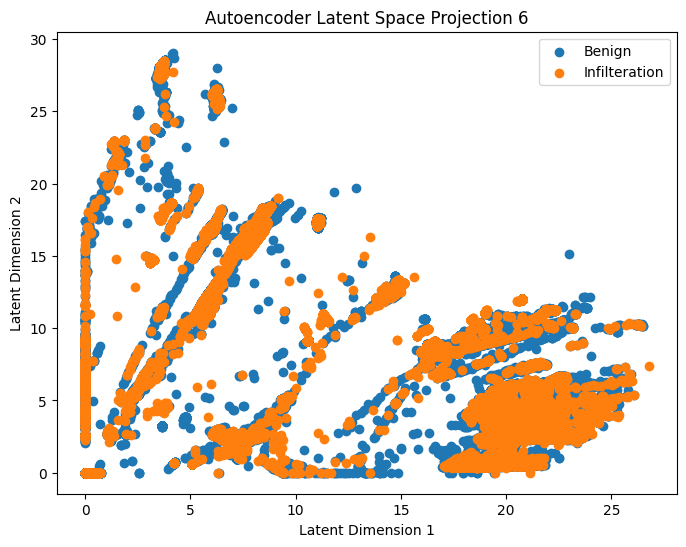

In [ ]:
# Get unique labels
unique_labels6 = np.unique(y_encoded6)
decoded_labels6 = np.unique(y6)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels6, decoded_labels6):
    indices = np.where(y_encoded6 == label)[0]
    plt.scatter(X_encoded6[indices, 0], X_encoded6[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 6')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

In [ ]:
data7 = pd.read_csv('/content/drive/MyDrive/DataSecurity/03-02-2018.csv')

data7.dropna(inplace=True)
X7 = data7.drop(columns=['Label', 'Timestamp'])
y7 = data7['Label']
X7 = X7.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
del data7

In [ ]:
X_train7, X_test7, y_train7, y_test7, X_scaled7, y_encoded7 = data_transformation(X7, y7)
X_encoded7, encoder_model7 = build_run_model(X_train7, X_test7, y_train7, y_test7, X_scaled7)
np.save('/content/drive/MyDrive/DataSecurity/03-02-2018_encoded.npy', X_encoded7)

Epoch 1/10
20921/20921 [==============================] - 81s 4ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 2/10
20921/20921 [==============================] - 52s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/10
20921/20921 [==============================] - 51s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/10
20921/20921 [==============================] - 54s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
20921/20921 [==============================] - 53s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/10
20921/20921 [==============================] - 54s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
20921/20921 [==============================] - 57s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/10
20921/20921 [==============================] - 61s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
20921/20921 [==============================] - 53s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/10
32689/32689 [==============================

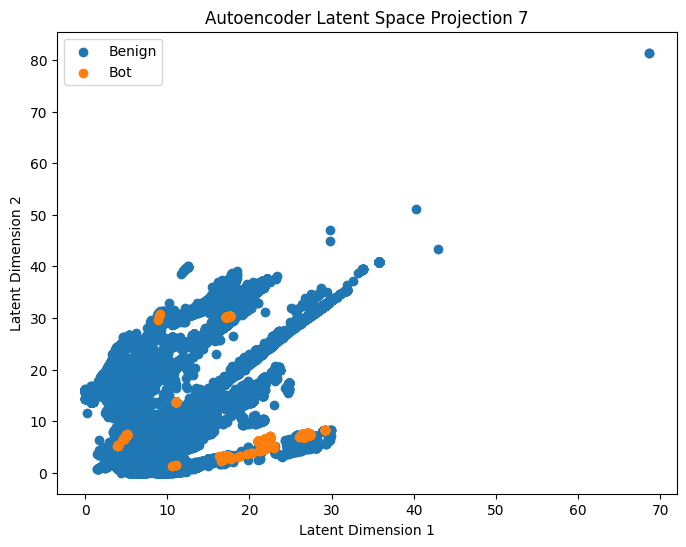

In [ ]:
# Get unique labels
unique_labels7 = np.unique(y_encoded7)
decoded_labels7 = np.unique(y7)

# Plot the encoded data points in the latent space with different colors for each label
plt.figure(figsize=(8, 6))
for label, decoded_label in zip(unique_labels7, decoded_labels7):
    indices = np.where(y_encoded7 == label)[0]
    plt.scatter(X_encoded7[indices, 0], X_encoded7[indices, 1], label=decoded_label)
plt.title('Autoencoder Latent Space Projection 7')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.show()

### Data Preparation for NN Classifier with Autoencoded Features

In [ ]:
projections1 = np.load('/content/drive/MyDrive/DataSecurity/02-14-2018_encoded.npy')
projections2 = np.load('/content/drive/MyDrive/DataSecurity/02-21-2018_encoded.npy')
projections3 = np.load('/content/drive/MyDrive/DataSecurity/02-22-2018_encoded.npy')
projections4 = np.load('/content/drive/MyDrive/DataSecurity/02-23-2018_encoded.npy')
projections5 = np.load('/content/drive/MyDrive/DataSecurity/02-28-2018_encoded.npy')
projections6 = np.load('/content/drive/MyDrive/DataSecurity/03-01-2018_encoded.npy')
projections7 = np.load('/content/drive/MyDrive/DataSecurity/03-02-2018_encoded.npy')

print(projections1.shape, projections2.shape, projections3.shape, projections4.shape, projections5.shape, projections6.shape, projections7.shape)

(1046298, 2) (1048575, 2) (1045006, 2) (1044821, 2) (609030, 2) (329266, 2) (1046017, 2)


In [ ]:
features = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']

X1_features = X1[features]
X2_features = X2[features]
X3_features = X3[features]
X4_features = X4[features]
X5_features = X5[features]
X6_features = X6[features]
X7_features = X7[features]

print(X1.shape, X2.shape, X3.shape, X4.shape, X5.shape, X6.shape, X7.shape)

del X1
del X2
del X3
del X4
del X5
del X6
del X7

(1046298, 78) (1048575, 78) (1045006, 78) (1044821, 78) (609030, 78) (329266, 78) (1046017, 78)


In [ ]:
X_list = [X1_features, X2_features, X3_features, X4_features, X5_features, X6_features, X7_features]
projections_list = [projections1, projections2, projections3, projections4, projections5, projections6, projections7]

for i in range(len(X_list)):
  X_list[i]['projection1'] = projections_list[i][:,0]
  X_list[i]['projection2'] = projections_list[i][:,1]

df_features = pd.concat(X_list, axis=0, ignore_index=True)
df_features

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,projection1,projection2
0,0.0,0.0,112641719.0,3.0,0.0,16.246782,9.915474
1,0.0,0.0,112641466.0,3.0,0.0,16.246782,9.915474
2,0.0,0.0,112638623.0,3.0,0.0,16.246780,9.915474
3,22.0,6.0,6453966.0,15.0,10.0,5.930030,19.507723
4,22.0,6.0,8804066.0,14.0,11.0,3.335379,9.798461
...,...,...,...,...,...,...,...
6169008,3389.0,6.0,3982183.0,14.0,8.0,13.339341,1.179976
6169009,3389.0,6.0,3802316.0,14.0,8.0,13.346446,1.184306
6169010,3389.0,6.0,4004239.0,14.0,8.0,13.331338,1.174590
6169011,3389.0,6.0,3998435.0,14.0,8.0,13.324647,1.174172


In [ ]:
labels = [y1, y2, y3, y4, y5, y6, y7]

labels = [label for y in labels for label in y]

#df_labels = pd.concat(labels, axis=0, ignore_index=True)
df_features['labels'] = labels
df_features

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,projection1,projection2,labels
0,0.0,0.0,112641719.0,3.0,0.0,16.246782,9.915474,Benign
1,0.0,0.0,112641466.0,3.0,0.0,16.246782,9.915474,Benign
2,0.0,0.0,112638623.0,3.0,0.0,16.246780,9.915474,Benign
3,22.0,6.0,6453966.0,15.0,10.0,5.930030,19.507723,Benign
4,22.0,6.0,8804066.0,14.0,11.0,3.335379,9.798461,Benign
...,...,...,...,...,...,...,...,...
6169008,3389.0,6.0,3982183.0,14.0,8.0,13.339341,1.179976,Benign
6169009,3389.0,6.0,3802316.0,14.0,8.0,13.346446,1.184306,Benign
6169010,3389.0,6.0,4004239.0,14.0,8.0,13.331338,1.174590,Benign
6169011,3389.0,6.0,3998435.0,14.0,8.0,13.324647,1.174172,Benign


In [ ]:
df_features.to_csv('/content/drive/MyDrive/DataSecurity/df_features_with_projections.csv')

In [ ]:
df_features = pd.read_csv('/content/drive/MyDrive/DataSecurity/df_features_with_projections.csv')

df_features.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,projection1,projection2,labels
0,0,0.0,0.0,112641719.0,3.0,0.0,16.246782,9.915474,Benign
1,1,0.0,0.0,112641466.0,3.0,0.0,16.246782,9.915474,Benign
2,2,0.0,0.0,112638623.0,3.0,0.0,16.246780,9.915474,Benign
3,3,22.0,6.0,6453966.0,15.0,10.0,5.930030,19.507723,Benign
4,4,22.0,6.0,8804066.0,14.0,11.0,3.335379,9.798461,Benign


In [ ]:
print(df_features.columns)
df_features = df_features.drop(columns=['Unnamed: 0'])

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'projection1', 'projection2', 'labels'],
      dtype='object')


* As it has been done for the Random Forest classifier, also in this case two different models will be built: the first for binary classification and the second for multiple classification. The Benign subset is sampled to ensure balancement in the dataset.

In [ ]:
df_features['labels2'] = [i if i == 'Benign' else 'Malign' for i in df_features['labels']]
df_attack = df_features.loc[df_features['labels'] != 'Benign']
df_benign = df_features.loc[df_features['labels'] == 'Benign']
df_benign_sample = df_benign.sample(n=1000000, random_state=1)

df_features_sample = pd.concat([df_benign_sample, df_attack], axis=0, ignore_index=True)
df_features_sample = df_features_sample.sample(frac = 1).reset_index()

In [ ]:
df_features_sample

,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,projection1,projection2,labels,labels2
0,2516107,50982.0,6.0,12101.0,5.0,2.0,21.747440,6.395564,Bot,Malign
1,1517651,80.0,6.0,10723.0,3.0,4.0,3.708318,6.618025,DDOS attack-HOIC,Malign
2,406139,53.0,17.0,310.0,1.0,1.0,15.852391,15.321855,Benign,Benign
3,487787,443.0,6.0,115393883.0,19.0,21.0,8.659407,0.158105,Benign,Benign
4,1594881,80.0,6.0,10672.0,3.0,4.0,3.483267,6.312023,DDOS attack-HOIC,Malign
...,...,...,...,...,...,...,...,...,...,...
2516895,2399861,8080.0,6.0,9747.0,3.0,4.0,21.942410,4.856565,Bot,Malign
2516896,1109295,21.0,6.0,2.0,1.0,1.0,10.927245,16.860064,FTP-BruteForce,Malign
2516897,593512,443.0,6.0,5253024.0,6.0,4.0,17.066240,5.950811,Benign,Benign
2516898,2319576,8080.0,6.0,526.0,2.0,0.0,17.173056,30.095472,Bot,Malign


### Neural Network Building and Running

In [ ]:
def data_transformation_for_nn(X,y):
  # Encode categorical labels
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)

  # Normalize the feature matrix using Min-Max normalization
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test, X_scaled, y_encoded, label_encoder

In [ ]:
def build_run_nn_classifier(X_train, X_test, y_train, y_test, output_dim=2):
  # Define the dimensions
  input_dim = X_train.shape[1]  # Number of features
  output_dim = output_dim  # Number of output classes

  # Define the neural network model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(output_dim, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

  # Train the model
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

  # Evaluate the model on the test set
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {test_loss}')
  print(f'Test Accuracy: {test_accuracy}')

  # Predictions
  predictions = model.predict(X_test)

  return predictions

In [ ]:
X = df_features_sample.drop(columns=['index', 'labels', 'labels2'])
y = df_features_sample['labels2']
X_train, X_test, y_train, y_test, X_scaled, y_encoded, label_encoder = data_transformation_for_nn(X,y)

In [ ]:
predictions = build_run_nn_classifier(X_train, X_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3154 (12.32 KB)
Trainable params: 3154 (12.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50338/50338 [==============================] - 140s 3ms/step - loss: 0.1392 - accuracy: 0.9369 - val_loss: 0.1042 - val_accuracy: 0.9470
Epoch 

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 1, 0, ..., 1, 1, 0])

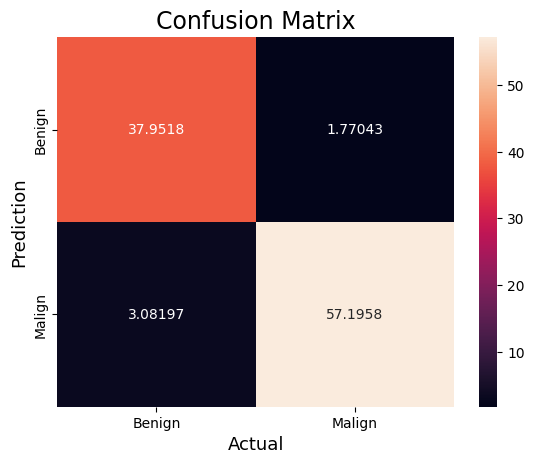

In [ ]:
#predictions_decoded = label_encoder.inverse_transform(predicted_labels)

confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)

sns.heatmap((confusion_matrix/len(y_test))*100,
            annot=True,
            fmt='g',
            xticklabels=['Benign','Malign'],
            yticklabels=['Benign','Malign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
X = df_features_sample.drop(columns=['index', 'labels', 'labels2'])
y = df_features_sample['labels']
X_train, X_test, y_train, y_test, X_scaled, y_encoded, label_encoder = data_transformation_for_nn(X,y)

In [ ]:
predictions = build_run_nn_classifier(X_train, X_test, y_train, y_test, output_dim=11)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 11)                187       
                                                                 
Total params: 3307 (12.92 KB)
Trainable params: 3307 (12.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50338/50338 [==============================] - 157s 3ms/step - loss: 0.1785 - accuracy: 0.9262 - val_loss: 0.1392 - val_accuracy: 0.9390
Epoc

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 7, 0, ..., 4, 6, 0])

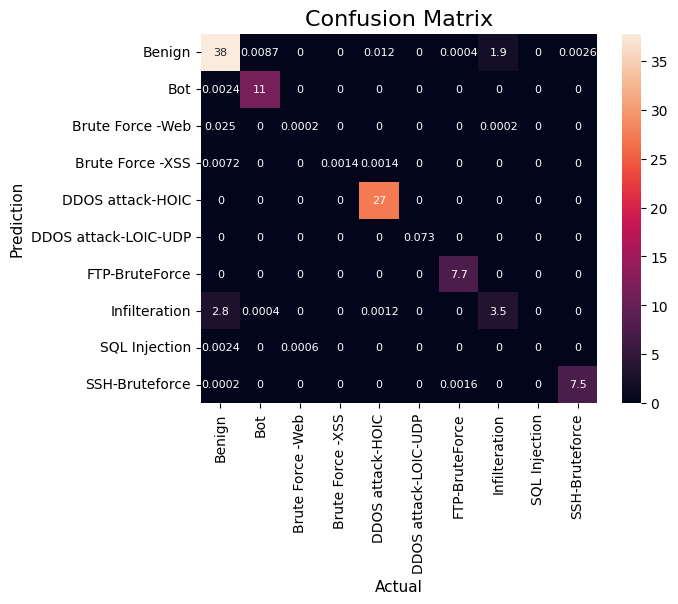

In [ ]:
cm_labels = np.unique(y)
cm_array = metrics.confusion_matrix(y_test, predicted_labels)
cm_array_df = pd.DataFrame((cm_array/len(y_test))*100, index=cm_labels, columns=cm_labels)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 8})
plt.ylabel('Prediction',fontsize=11)
plt.xlabel('Actual',fontsize=11)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
data5 = pd.read_csv('/content/drive/MyDrive/DataSecurity/02-28-2018.csv')
data5.dropna(inplace=True)

data5 = data5.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data5 = data5[data5['Dst Port'].apply(lambda x: is_int(x))]
for column in data5.columns:
  data5[column] = data5[column].apply(custom_convert)
data5 = data5.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    label = df['Label']
    df = df.drop(columns=['Label', 'Timestamp'])
    df.dropna(inplace=True)
    # Convert infinities to NaN, then drop rows with any NaN values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    features = df[indices_to_keep].astype(np.float64).round(2)
    label = label[indices_to_keep]
    df = pd.concat([features, label], axis=1)
    return df.reset_index(drop=True)

data5 = clean_dataset(data5)

X5 = data5.drop(columns=['Label'])
y5 = data5['Label']

del data5

* Despite the good performance shown by the model, it seems that the most problematic type of attack is the Infiltration, as it is also shown by the results of the autoencoding procedure on this dataset. Therefore, in what follows, I will try to run a NN classifier model only for Infiltration vs a Benign activity sample.

In [ ]:
X5['Flow Byts/s'] = X5['Flow Byts/s'].replace((np.inf, -np.inf, np.nan), 0)
X5['Flow Pkts/s'] = X5['Flow Pkts/s'].replace((np.inf, -np.inf, np.nan), 0)

In [ ]:
data6 = pd.read_csv('/content/drive/MyDrive/DataSecurity/03-01-2018.csv')

data6.dropna(inplace=True)

data6 = data6.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data6 = data6[data6['Dst Port'].apply(lambda x: is_int(x))]
for column in data6.columns:
  data6[column] = data6[column].apply(custom_convert)
data6 = data6.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

data6 = clean_dataset(data6)

X6 = data6.drop(columns=['Label'])
y6 = data6['Label']

del data6

In [ ]:
X6['Flow Byts/s'] = X6['Flow Byts/s'].replace((np.inf, -np.inf, np.nan), 0)
X6['Flow Pkts/s'] = X6['Flow Pkts/s'].replace((np.inf, -np.inf, np.nan), 0)

In [ ]:
X = pd.concat([X5, X6], axis=0, ignore_index=True)
y = pd.concat([y5, y6], axis=0, ignore_index=True)
df_infiltration = pd.concat([X,y], axis=1)
df_infiltration

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443.0,6.0,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,118.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,443.0,6.0,206.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,445.0,6.0,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,6.0,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,118.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,6.0,167.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938291,0.0,0.0,118494070.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
938292,2634.0,6.0,114340.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
938293,3389.0,6.0,1404866.0,8.0,7.0,1132.0,1581.0,661.0,0.0,141.5,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
938294,3389.0,6.0,3966663.0,14.0,7.0,1386.0,392.0,680.0,0.0,99.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
df_attack_infiltration = df_infiltration.loc[df_infiltration['Label'] != 'Benign']
df_benign_infiltration = df_infiltration.loc[df_infiltration['Label'] == 'Benign']
df_benign_infiltration_sample = df_benign_infiltration.sample(n=200000, random_state=1)

df_infiltration_sample = pd.concat([df_benign_infiltration_sample, df_attack_infiltration], axis=0, ignore_index=True)
X = df_infiltration_sample.drop(columns='Label')
y = df_infiltration_sample['Label']

<Axes: >

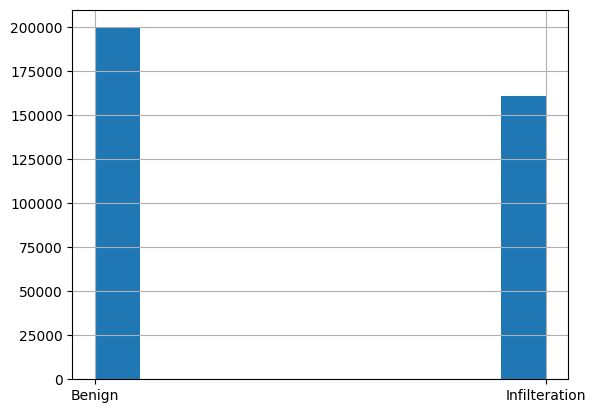

In [ ]:
y.hist()

In [ ]:
X_train, X_test, y_train, y_test, X_scaled, y_encoded, label_encoder = data_transformation_for_nn(X,y)

In [ ]:
def build_run_nn_classifier_infiltration(X_train, X_test, y_train, y_test, output_dim=2):
  # Define the dimensions
  input_dim = X_train.shape[1]  # Number of features
  output_dim = output_dim  # Number of output classes

  # Define the neural network model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(input_dim,)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(output_dim, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

  # Train the model
  history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

  # Evaluate the model on the test set
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {test_loss}')
  print(f'Test Accuracy: {test_accuracy}')

  # Predictions
  predictions = model.predict(X_test)

  return predictions

In [ ]:
predictions = build_run_nn_classifier_infiltration(X_train, X_test, y_train, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               20224     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 61506 (240.26 KB)
Trainable params: 61506 (240.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
7222/7222 [==============================] - 20s 3ms/step - loss: 0.6668 - accuracy: 0.6010 - val_loss: 0.6627 - val_accuracy: 0.6065
Epo

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 0, 1, ..., 0, 0, 0])

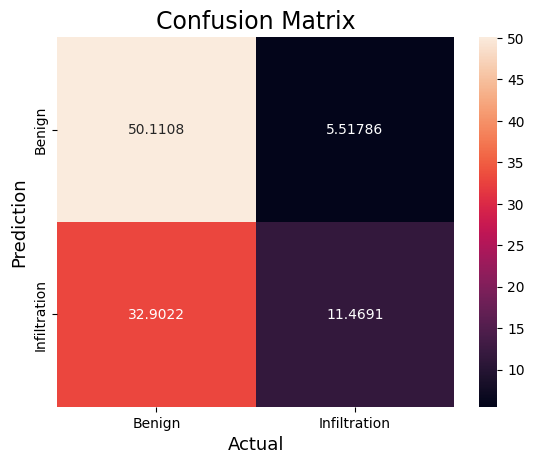

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)

sns.heatmap((confusion_matrix/len(y_test))*100,
            annot=True,
            fmt='g',
            xticklabels=['Benign','Infiltration'],
            yticklabels=['Benign','Infiltration'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()